# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


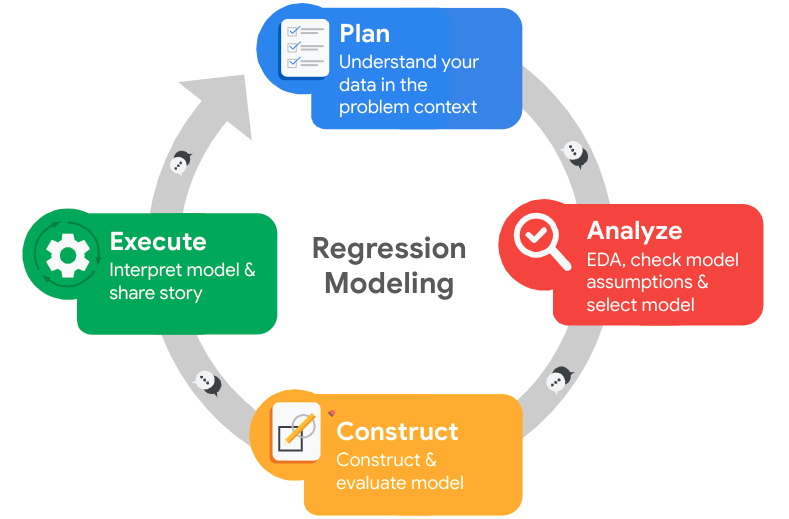

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




The stakeholder for this project is the HR Department at Salifort Motors. They want to identify the factors contributing to employees leaving because it is time-consuming and expensive to find, interview, hire, and train new employees. Increasing employee retention will be beneficial to the company as it reduces financial costs.

The goal of the stakeholder is to have a model that predicts whether or not an employee will leave Salifort Motors.

Initial observations of the data dictionary indicates that `left` is the most appropriate target variable. The description of this variable is "whether or not the employee left the company." We will use the other variables to predict whether an employee has left (equal 1) or stayed (equal 0).

We will be using the "HR_capstone_dataset.csv" data from [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv) for this project. The public dataset and its free use license can be found [here](https://creativecommons.org/publicdomain/zero/1.0/).

The dataset does not have any information that can identify people and there doesn't seem to be any ethical considerations at this stage.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For data modeling
from xgboost import XGBClassifier, XGBRegressor, plot_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# For metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
                            recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, \
                            roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

# For displaying all of the columns in dataframes, preventing Juptyer from redacting them
pd.set_option('display.max_columns', None)

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


There are 14,999 rows with 10 columns. There is no missing data since all 10 columns have 14,999 non-null counts. 

Datatype:

- float - `satisfaction_level`, `last_evaluation`

- integer - `number_project`, `average_montly_hours`, `time_spend_company`, `Work_accident`, `left`, `promotion_last_5years`

- object - `Department`, `salary`

In [4]:
# Find number of unique value(s) in each column

df0.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Department                10
salary                     3
dtype: int64

In [5]:
# Print unique values from each column

for col in df0:
    print(col)
#    print(df0[col].unique())
    print(sorted(df0[col].unique()))
    print()

# Another way to display unique values from each column, but in condensed format
#df0.apply(np.unique)

satisfaction_level
[0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]

last_evaluation
[0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]

number_project
[2, 3, 4, 5, 6, 7]

a

### Gather descriptive statistics about the data

In [6]:
# Gather descriptive statistics about the data
df0.describe(include='all')

satisfaction_level  last_evaluation  number_project  \
count         14999.000000     14999.000000    14999.000000   
unique                 NaN              NaN             NaN   
top                    NaN              NaN             NaN   
freq                   NaN              NaN             NaN   
mean              0.612834         0.716102        3.803054   
std               0.248631         0.171169        1.232592   
min               0.090000         0.360000        2.000000   
25%               0.440000         0.560000        3.000000   
50%               0.640000         0.720000        4.000000   
75%               0.820000         0.870000        5.000000   
max               1.000000         1.000000        7.000000   

        average_montly_hours  time_spend_company  Work_accident          left  \
count           14999.000000        14999.000000   14999.000000  14999.000000   
unique                   NaN                 NaN            NaN           NaN   
top                      NaN                 NaN            NaN           NaN   
freq                     NaN                 NaN            NaN           NaN   
mean              201.050337            3.498233       0.144610      0.238083   
std                49.943099            1.460136       0.351719      0.425924   
min                96.000000            2.000000       0.000000      0.000000   
25%               156.000000            3.000000       0.000000      0.000000   
50%               200.000000            3.000000       0.000000      0.000000   
75%               245.000000            4.000000       0.000000      0.000000   
max               310.000000           10.000000       1.000000      1.000000   

        promotion_last_5years Department salary  
count            14999.000000      14999  14999  
unique                    NaN         10      3  
top                       NaN      sales    low  
freq                      NaN       4140   7316  
mean                 0.021268        NaN    NaN  
std                  0.144281        NaN    NaN  
min                  0.000000        NaN    NaN  
25%                  0.000000        NaN    NaN  
50%                  0.000000        NaN    NaN  
75%                  0.000000        NaN    NaN  
max                  1.000000        NaN    NaN

We will need to look into the mean of `average_montly_hours`=201.050337 because it seems too high.

40 hours per week * 52 weeks per year / 12 months = 173.33 working hours per month. This does not include vacation time or sick leave. There will be an analysis of this in the appropriate section below.

Being overworked may contribute to an employee leaving.

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [7]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
# Rename columns as needed
df0 = df0.rename(columns={'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Work_accident': 'work_accident',
                          'Department': 'department'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [9]:
# Check for missing values
print('Number of rows with missing data: ', df0.isna().any(axis=1).sum(), sep='')
print()
print('Number of missing data in each column:')
print(df0.isna().sum(axis=0))
print()
print('Row(s) with missing data:')
print(df0[df0.isna().any(axis=1)])

Number of rows with missing data: 0

Number of missing data in each column:
satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

Row(s) with missing data:
Empty DataFrame
Columns: [satisfaction_level, last_evaluation, number_project, average_monthly_hours, tenure, work_accident, left, promotion_last_5years, department, salary]
Index: []


Confirmation of no missing data as seen from `.info()`.

In [10]:
# If there were missing data and it was okay to drop, use this cell

# Drop rows with missing values and reindex

#df0_subset = df0.dropna(axis=0).reset_index(drop=True)

### Check duplicates

Check for any duplicate entries in the data.

In [11]:
# Check for duplicates
print('Number duplicated data: ', df0.duplicated().sum(), sep='')

Number duplicated data: 3008


Out of 14,999 rows, 3,008 are duplicates. That is about 20.1% of the dataset.

In [12]:
print(round(df0.duplicated().sum() / df0.shape[0] * 100, 1), '% of the dataset are duplicates.', sep='')

20.1% of the dataset are duplicates.


In [13]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()]

satisfaction_level  last_evaluation  number_project  \
396                  0.46             0.57               2   
866                  0.41             0.46               2   
1317                 0.37             0.51               2   
1368                 0.41             0.52               2   
1461                 0.42             0.53               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_monthly_hours  tenure  work_accident  left  \
396                      139       3              0     1   
866                      128       3              0     1   
1317                     127       3              0     1   
1368                     132       3              0     1   
1461                     142       3              0     1   
...                      ...     ...            ...   ...   
14994                    151       3              0     1   
14995                    160       3              0     1   
14996                    143       3              0     1   
14997                    280       4              0     1   
14998                    158       3              0     1   

       promotion_last_5years  department  salary  
396                        0       sales     low  
866                        0  accounting     low  
1317                       0       sales  medium  
1368                       0       RandD     low  
1461                       0       sales     low  
...                      ...         ...     ...  
14994                      0     support     low  
14995                      0     support     low  
14996                      0     support     low  
14997                      0     support     low  
14998                      0     support     low  

[3008 rows x 10 columns]

The likelihood of multiple employees having the same response over 10 columns does not seem very plausible. The responses could have been counted more than once, so we will drop the rows from the dataset.

In [14]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

In [15]:
# Display shape of new dataframe
print(df1.shape)
print()

# Confirm the correct number of rows were dropped
print(df0.shape[0] - df1.shape[0], 'rows were dropped.')

(11991, 10)

3008 rows were dropped.


### Check outliers

Check for outliers in the data.

In [16]:
# Function plot boxplot to check for specific outliers
def outliers_boxplot(data):
    '''
    Accepts as argument dataframe column. 
    Returns a boxplot display of dataframe column.
    '''
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=data)
    plt.title('Boxplot to detect outliers for \'' + data.name + '\'')
    plt.show()

In [17]:
# Function plot boxplot to check for specific outliers and display count
def outliers_boxplot_count(data):
    '''
    Accepts as argument dataframe column. 
    Returns a boxplot display of dataframe column.
    '''
    # Set figure and axes
    fig, ax = plt.subplots(1, 2, figsize = (22,5))

    sns.boxplot(x=data, ax=ax[0])
    ax[0].set_title('Boxplot to detect outliers for \'' + data.name + '\'')

    sns.histplot(data=data, ax=ax[1])
    ax[1].set_title('Count for \'' + data.name + '\'')
    plt.show()

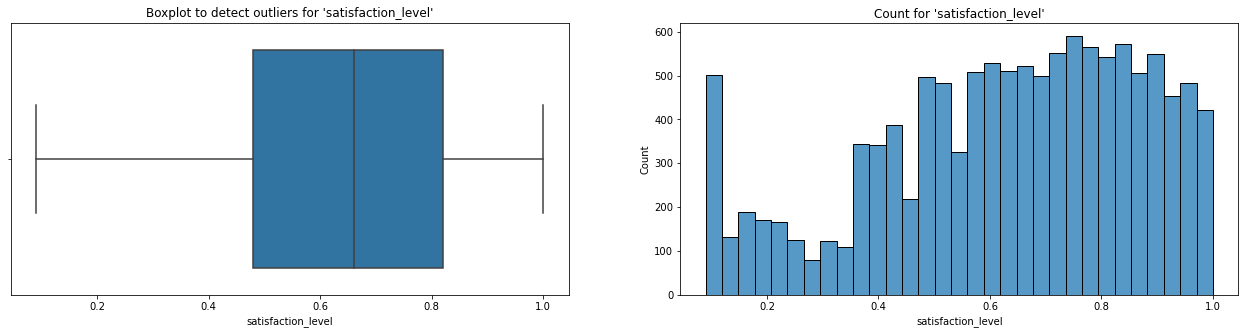

In [18]:
# Create a boxplot to visualize distribution of `satisfaction_level` and detect any outliers
outliers_boxplot_count(df1['satisfaction_level'])

`satisfaction_level` has an unusual distribution. It seems to be bimodal but we'll look more into this later.

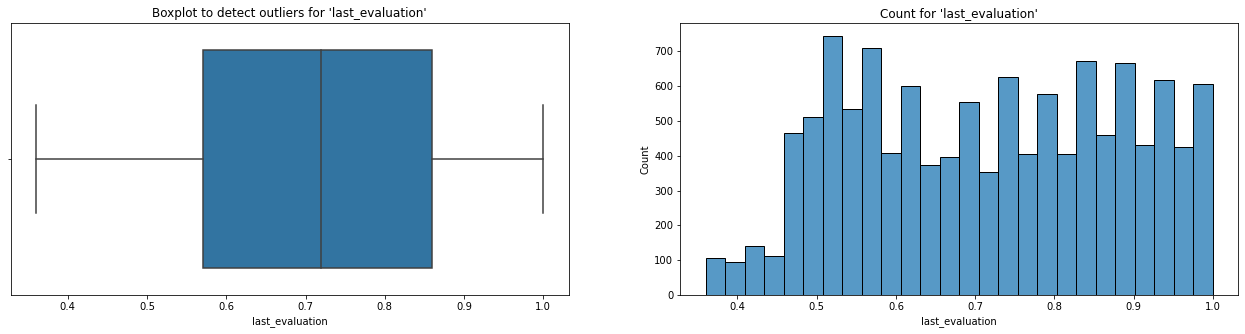

In [19]:
# Create a boxplot to visualize distribution of `last_evaluation` and detect any outliers
outliers_boxplot_count(df1['last_evaluation'])

`last_evaluation` also has an unusual distribution, but not as significant as `satisfaction_level`.

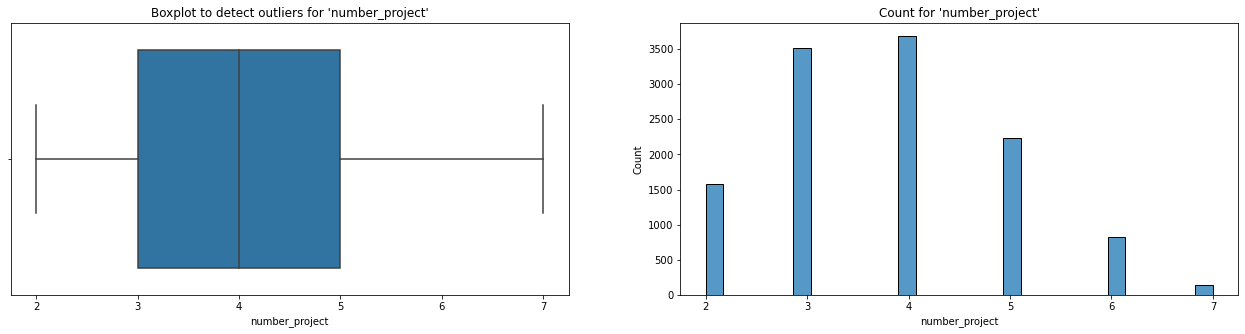

In [20]:
# Create a boxplot to visualize distribution of `number_project` and detect any outliers
outliers_boxplot_count(df1['number_project'])

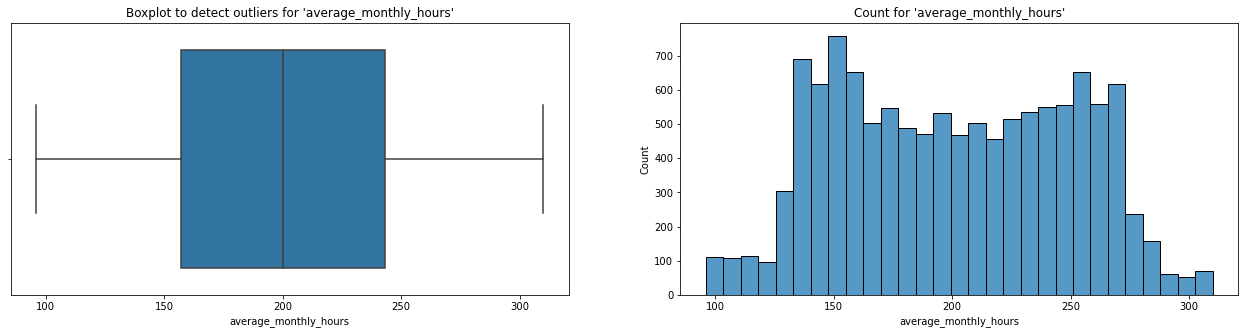

In [21]:
# Create a boxplot to visualize distribution of `average_monthly_hours` and detect any outliers
outliers_boxplot_count(df1['average_monthly_hours'])

`average_monthly_hours` shows an unusual ditribution.

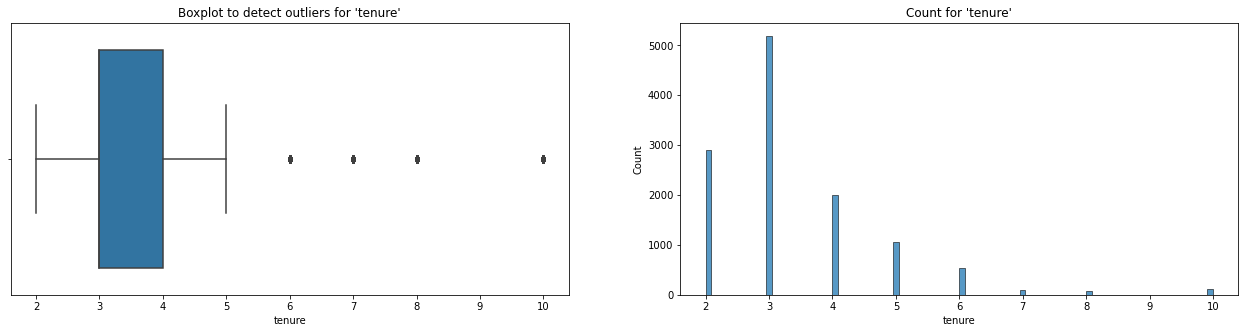

In [22]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
outliers_boxplot_count(df1['tenure'])

There are outliers for `tenure`. We'll go into details later.

There is no concept of outliers for categorical variables so we will use pie charts or histograms to display the counts for `work_accident`, `left`, `promotion_last_5years`, `department`, and `salary`.

In [23]:
# Function plot piechart
# autopct='%1.1f%%'
def pie_chart(data, colname):
    '''
    Accepts as argument dataframe and column name
    Returns a piechart display of dataframe column.
    ''' 
    def autopct_format1(prct_value):
        '''
        Accepts percentage
        Returns formatted text with percentage and counts
        '''
        return '{:.1f}%\n{:.0f}'.format(prct_value, total_of_counts*prct_value/100)

    fig = plt.figure(figsize=(6, 6))

    vc_df = data[colname].value_counts().rename_axis('sub_cat_values').reset_index(name='counts')
    total_of_counts = vc_df.counts.sum()

    plt.pie(vc_df.counts, labels=vc_df.sub_cat_values,
            autopct=autopct_format1, textprops={'fontsize':14, 'color':"w"})
    plt.title('Pie chart for \'' + colname + '\'')
    plt.legend(title=colname, loc="upper right", labels=vc_df.sub_cat_values, bbox_to_anchor=(1.2, 1.0))
    plt.show()

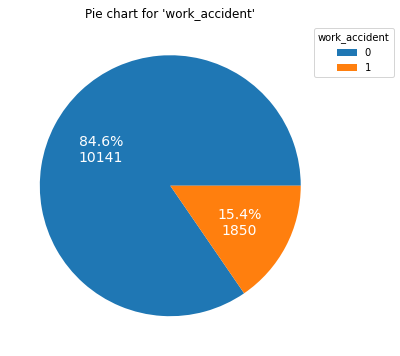

In [24]:
# Create a piechart to visualize `work_accident`
pie_chart(df1, 'work_accident')

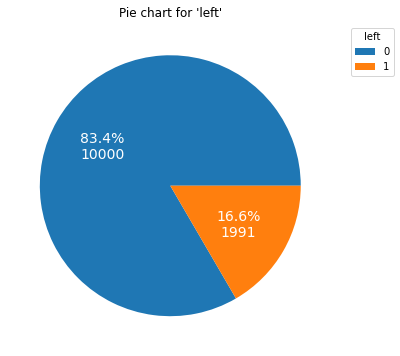

In [25]:
# Create a piechart to visualize `left`
pie_chart(df1, 'left')

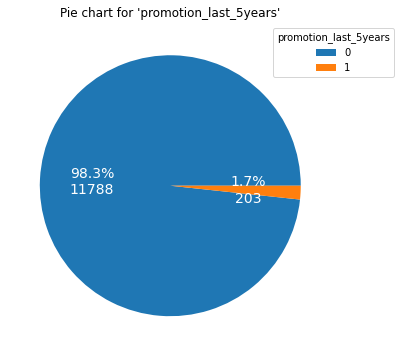

In [26]:
# Create a piechart to visualize `promotion_last_5years`
pie_chart(df1, 'promotion_last_5years')

A very low percentage of the employees received promotions within the last 5 years.  We might want to explore why.

In [27]:
def bar_plot(data, colname):
    '''
    Accepts as argument dataframe and column name
    Returns a piechart display of dataframe column.
    '''
    plt.figure(figsize=(8, 5))
    plt.bar(data[colname].unique(), data[colname].value_counts(), width = 0.8)
    plt.title('Bar plot for \'' + colname + '\'')
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.show()

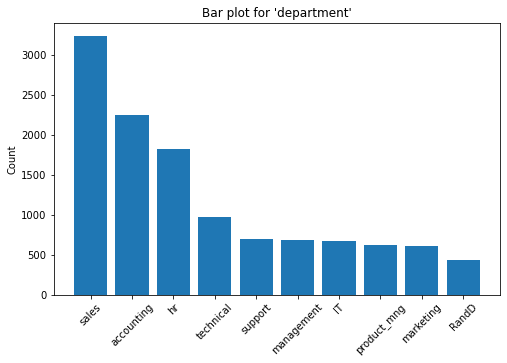

In [28]:
# Create a bar chart to visualize `department`
bar_plot(df1, 'department')

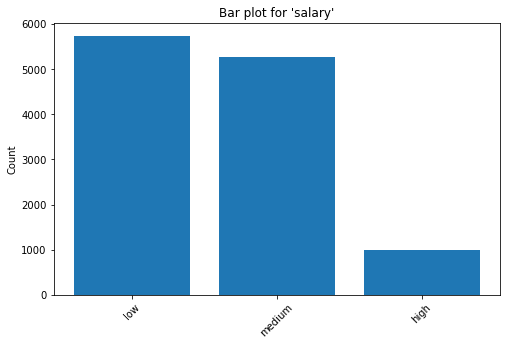

In [29]:
# Create a bar chart to visualize `salary`
bar_plot(df1, 'salary')

There were outliers for `tenure` so let's look at the number of rows and lower and upper limits.

In [30]:
# Function to find outliers
def outliers_func(data, colname):
    '''
    Accepts a dataframe and column name
    Returns lower limit and upper limit
    '''
    percentile25 = data[colname].quantile(0.25)
    percentile75 = data[colname].quantile(0.75)

    iqr = percentile75 - percentile25

    upper_limit = percentile75 + iqr * 1.5
    lower_limit = percentile25 - iqr * 1.5
    
    return lower_limit, upper_limit

In [31]:
# Function to display outliers
# Determine lower limit, upper limit, and the number of rows containing outliers
def outliers_check(data, colname):
    '''
    Accepts a dataframe and column name
    Returns lower limit, upper limit, and number of rows in column with outliers
    '''
    
    lower_limit, upper_limit = outliers_func(data, colname)

    print(f'Lower limit for \'{colname}\': {lower_limit}')
    print(f'Upper limit for \'{colname}\': {upper_limit}')

    # Identify subset of data containing outliers in `colname`
    outliers = df1[(df1[colname] > upper_limit) | (df1[colname] < lower_limit)]

    # Count how many rows in the data contain outliers in `colname`
    print(f'Number of rows in the data containing outliers in \'{colname}\': {len(outliers)}')



In [32]:
# Function to handle outliers
def outliers_handle(data, colname):
    '''
    Accepts a dataframe and column name
    Returns dataframe
    '''

    lower_limit, upper_limit = outliers_func(data, colname)
    
    # Excludes rows of outliers from dataset
    data_no_outliers = data[(data[colname] >= lower_limit) & (data[colname] <= upper_limit)]

    return data_no_outliers

    # Replace all values over upper_limit with upper_limit value
    # Find row location where colname > upper_limit and in colname column, then set that location's value to upper_limit
    #data.loc[data[colname] > upper_limit, colname] = upper_limit

    # If in the future we want to drop the outlier rows instead of setting value to 'upper_limit', we can drop the rows
    # Need to refine the 2 lines of code below
    #outliers_df = data[data[colname] > upper_limit]
    #data_no_outlier = data.drop(outliers_df.index)

In [33]:
# Check for outliers for 'tenure'
outliers_check(df1, 'tenure')

Lower limit for 'tenure': 1.5
Upper limit for 'tenure': 5.5
Number of rows in the data containing outliers in 'tenure': 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [34]:
# Get numbers of people who stayed vs. left
# 0: stayed
# 1: left
print('Number of people who stayed vs. left:')
print(df1['left'].value_counts())

print()

# Get percentages of people who stayed vs. left
# 0: stayed
# 1: left
print('Percentage of people who stayed vs. left:')
print(df1['left'].value_counts(normalize=True)*100)

Number of people who stayed vs. left:
0    10000
1     1991
Name: left, dtype: int64

Percentage of people who stayed vs. left:
0    83.39588
1    16.60412
Name: left, dtype: float64


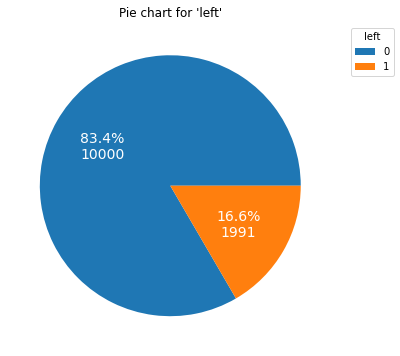

In [35]:
# Create a piechart to visualize `left`
pie_chart(df1, 'left')

### Data visualizations

Defining fuctions that will help with visualization.

In [36]:
# Function for creating side-by-side of displays of boxplot and histogram
def plot_box_hist(data, x_data, y_data, z_data):
    '''
    Accept dataframe, column 1, column 2, and column 3 names
    Returns boxplot and histogram of x_data vs. y_data with respect to z_data
    '''
    # Set figure and axes
    fig, ax = plt.subplots(1, 2, figsize = (22,8))

    # Create boxplot showing x_data distributions for y_data, comparing z_data
    sns.boxplot(data=data, x=x_data, y=y_data, hue=z_data, orient='h', ax=ax[0])
    ax[0].invert_yaxis()
    ax[0].set_title('\'' + x_data +  '\'' + ' by ' + '\'' + y_data + '\' boxplot', fontsize='14')
    if x_data == 'average_monthly_hours':
        ax[0].axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
#    elif x_data == 'last_evaluation':
#        ax[0].axvline(x=0.716683, color='#ff6361', label='0.716683 avg. satisfaction', ls='--')

    # Create histogram showing distribution of y_data, comparing z_data
    sns.histplot(data=data, x=y_data, hue=z_data, multiple='dodge', shrink=3, ax=ax[1])
    ax[1].set_title('\'' + y_data + '\'' + ' histogram', fontsize='14')

    plt.tight_layout()
    
    # Display the plots
    plt.show()

In [37]:
# Function for creating scatterplot
def plot_scatter(data, x_data, y_data, z_data):
    '''
    Accepts dataframe, column1, column2, and column3 names
    Returns scatterplot of x_data vs. y_data with respect to z_data
    '''
    plt.figure(figsize=(15, 8))
    sns.scatterplot(data=data, x=x_data, y=y_data, hue=z_data, alpha=0.4)
    if (x_data == 'average_monthly_hours'):
        plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
    plt.legend()
    plt.title('\'' + x_data +  '\'' + ' by ' + '\'' + y_data + '\' scatterplot', fontsize='14');
    plt.show()

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

Quick overview of histograms for columns with kernel density estimation line.

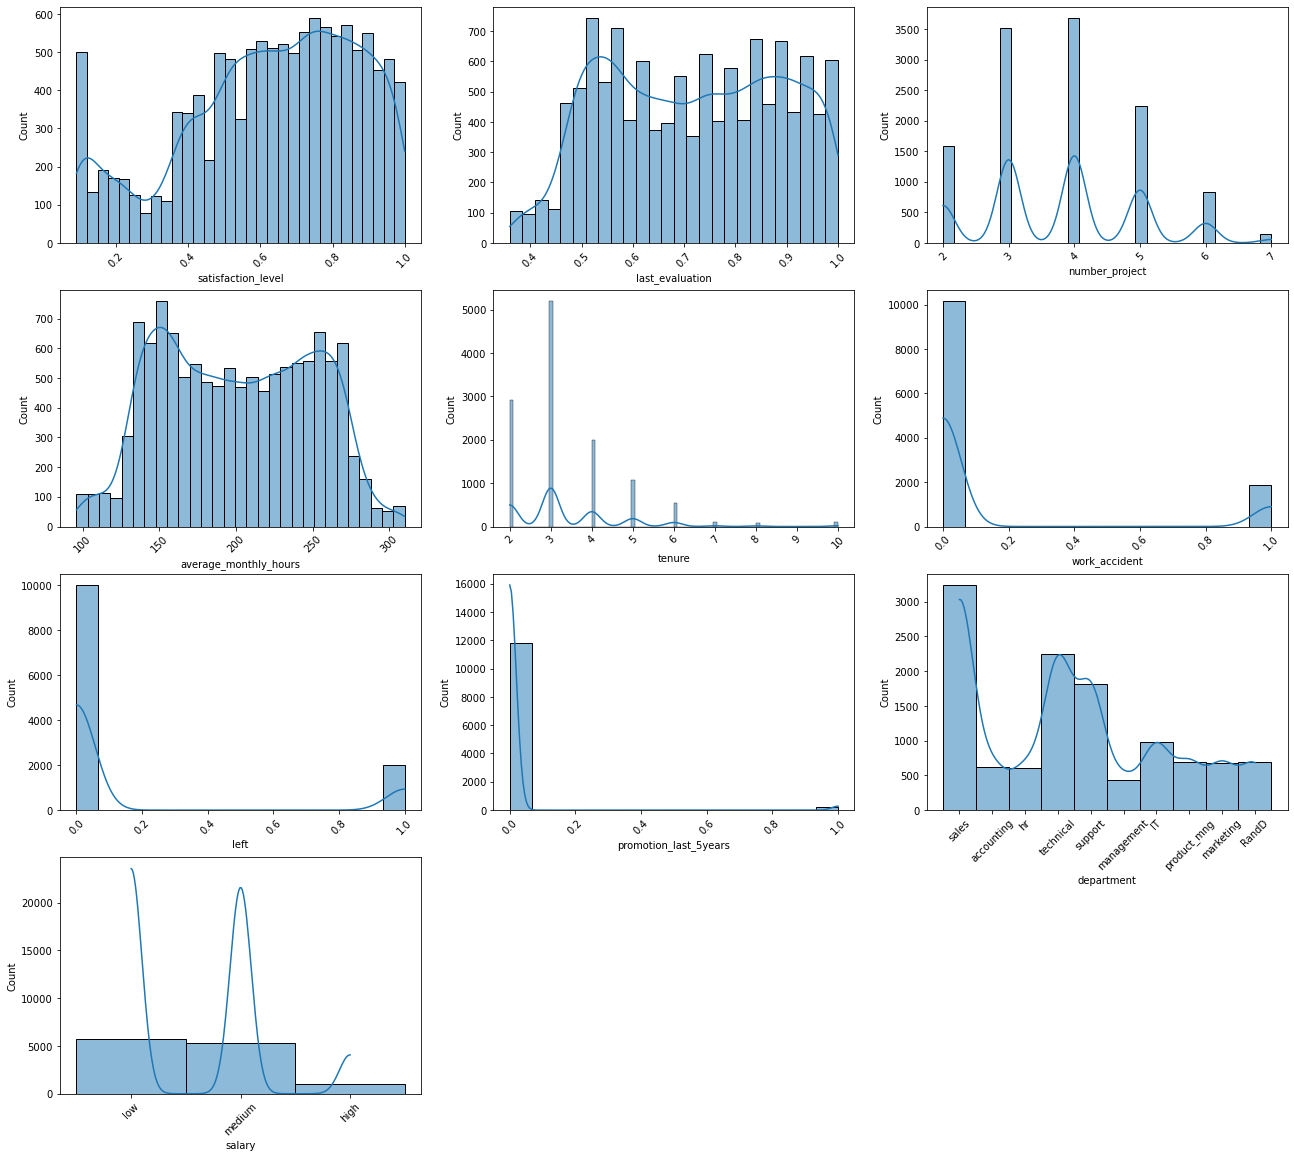

In [38]:
# Display histograms and kernel density estimation line for columns
plt.figure(figsize=(22, 20))
for i, column in enumerate(df1.columns, 1):
    plt.subplot(4, 3, i)
    ax = sns.histplot(df1[column], kde=True)
    ax.tick_params(axis='x', labelrotation=45)
plt.show()

# Display histograms of all non-categorical columns
#fig, axis = plt.subplots(2, 4, figsize=(15, 10))
#df1.hist(ax=axis, edgecolor='black', grid=False)
#plt.show()

Overview of scatterplots for pairwise variables.

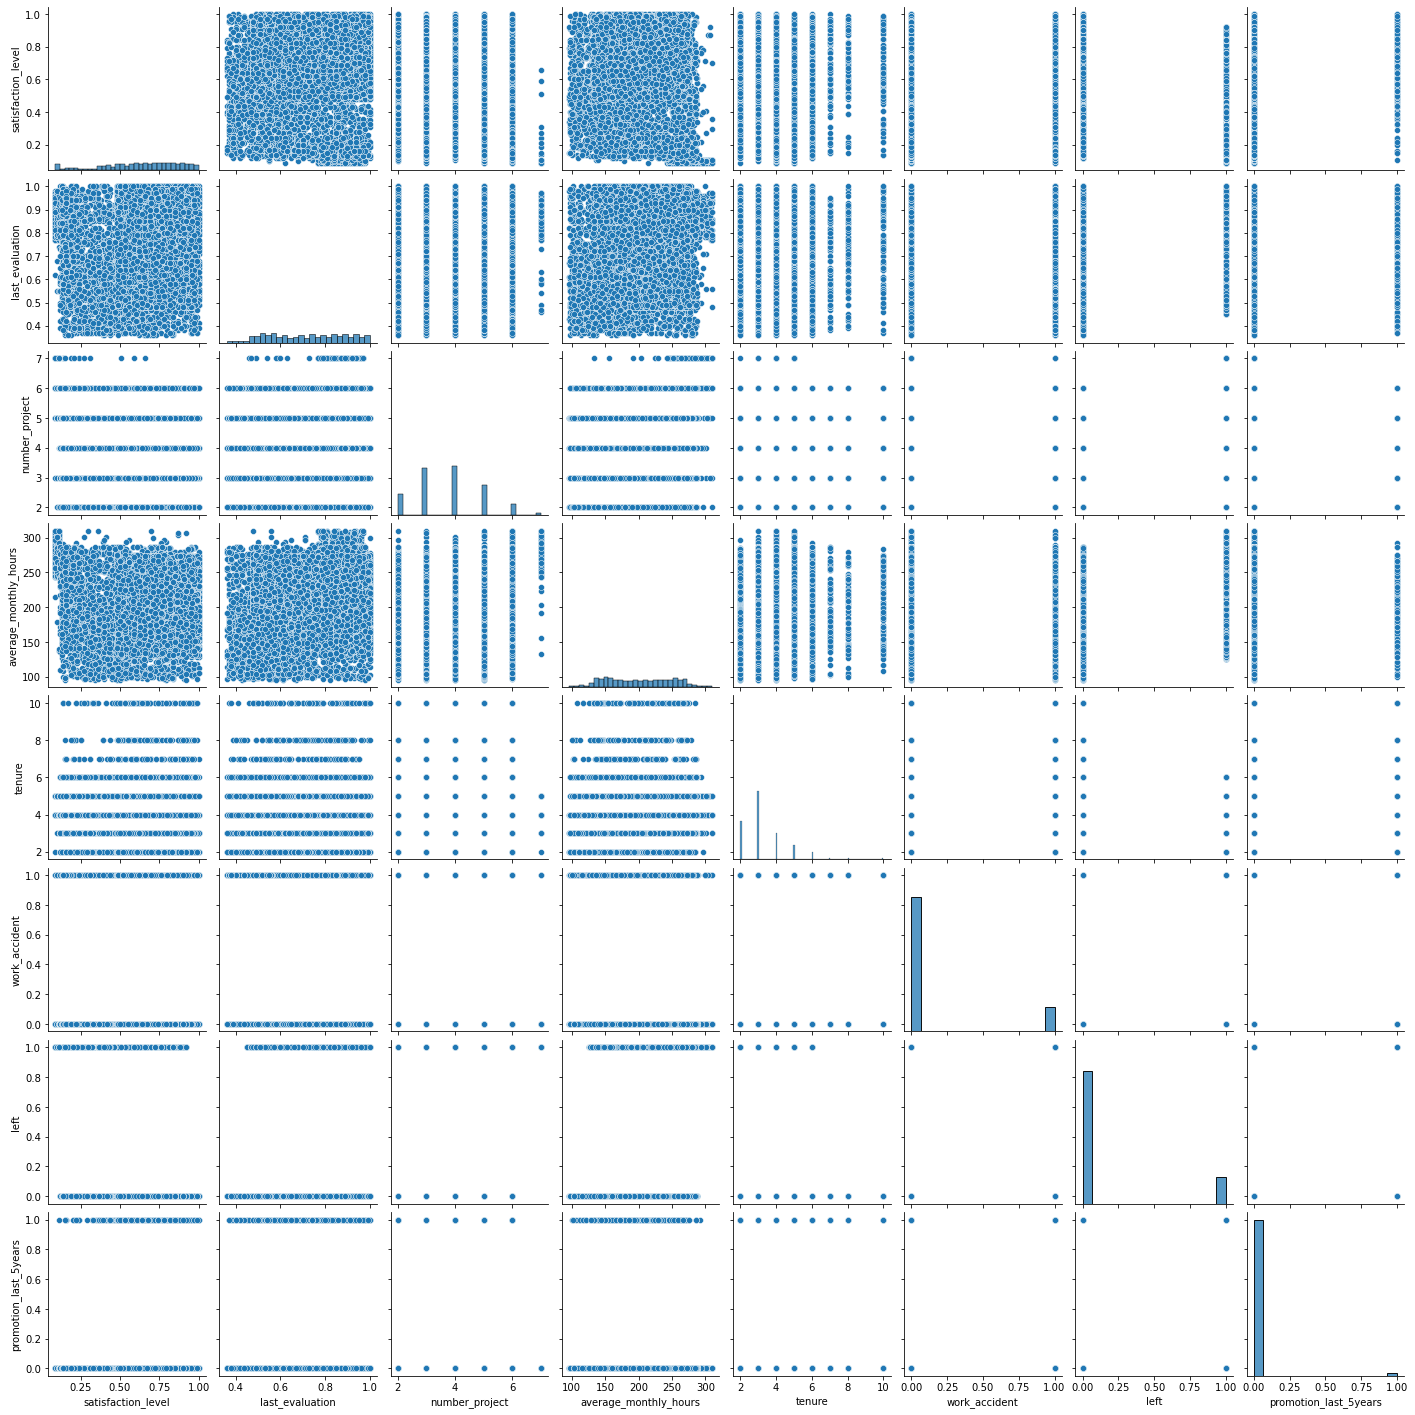

In [39]:
# Display scatterplot matrix of pairwise variables
sns.pairplot(df1)
plt.show()

Overview of scatterplots for pairwise variables with respect to employees who left or stayed.

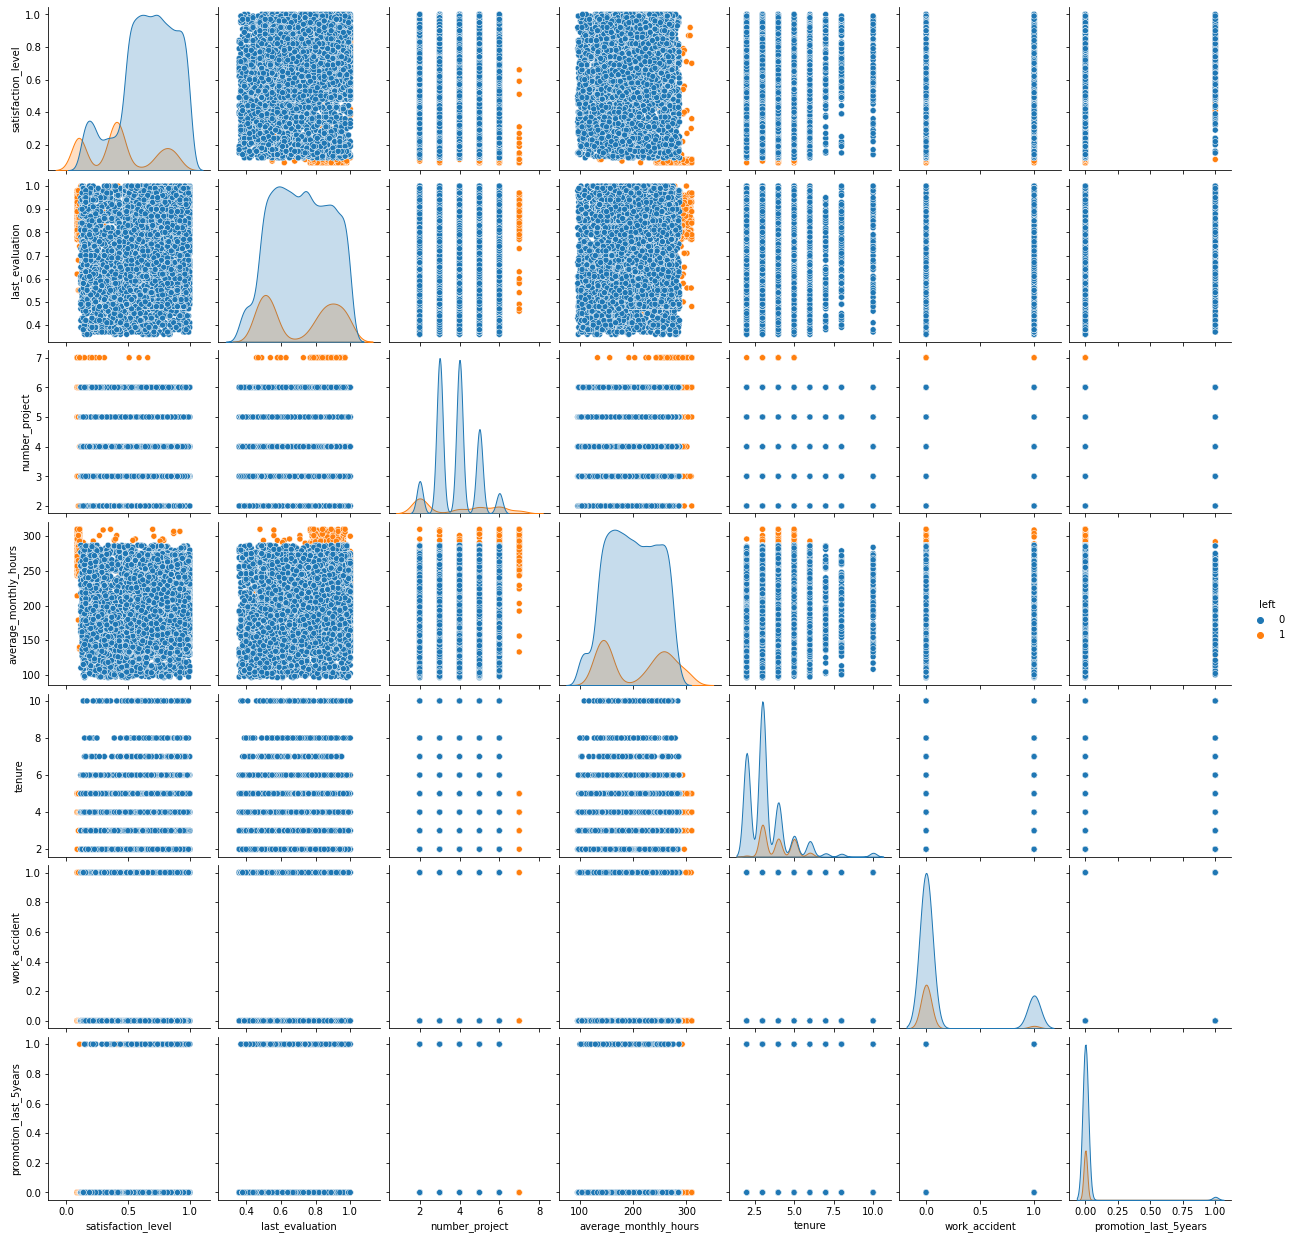

In [40]:
# Display scatterplot matrix of pairwise variables with respect to employees who left versus stayed
sns.pairplot(df1, hue='left')
plt.show()

Create a heatmap to visualize how correlated the variables are.

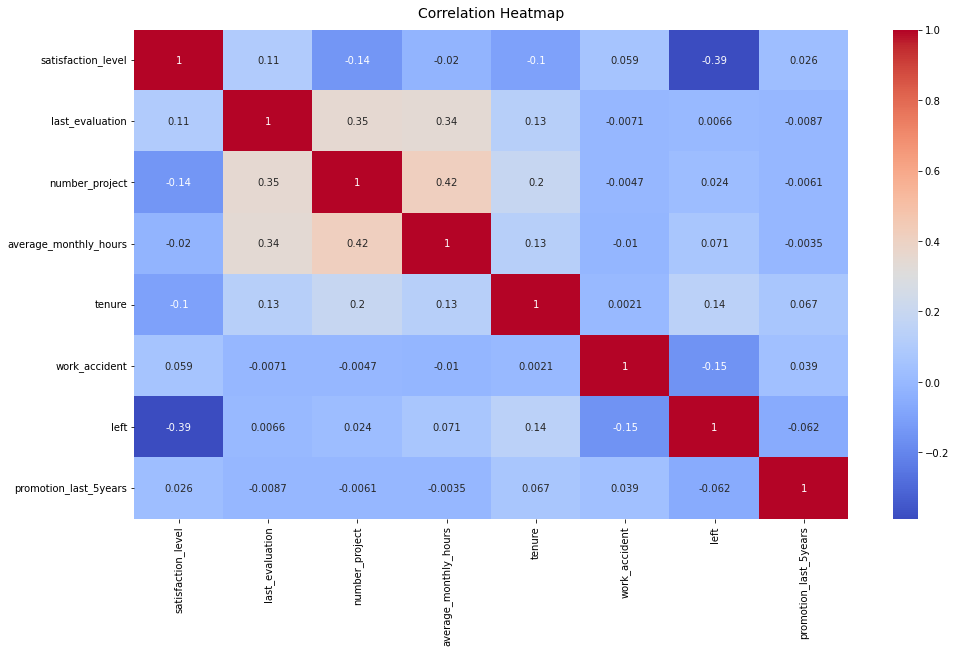

In [41]:
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), annot=True, cmap=sns.color_palette('coolwarm', as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The variables that have moderate positive correlation with one another are `last_evaluation`, `number_project`, and `average_monthly_hours`. `satisfaction_level` and `left` have moderate negative correlation.

The correlations of interest are:  
- `average_monthly_hours` and `number_project`at 0.42
- `last_evaluation` and `number_project` at 0.35
- `last_evaluation` and `average_monthly_hours` at 0.34
- `left` and `satisfaction_level` at -0.39

Create grouped boxplot showing `average_monthly_hours` distributions for `number_project`, comparing the distributions of employees who stayed (0) versus those who left (1).

Box plots are very useful in visualizing distributions within data, but they can be deceiving without the context of how big the sample sizes that they represent are. So we plot a histogram to visualize the distribution of `number_project` for those who stayed and those who left.

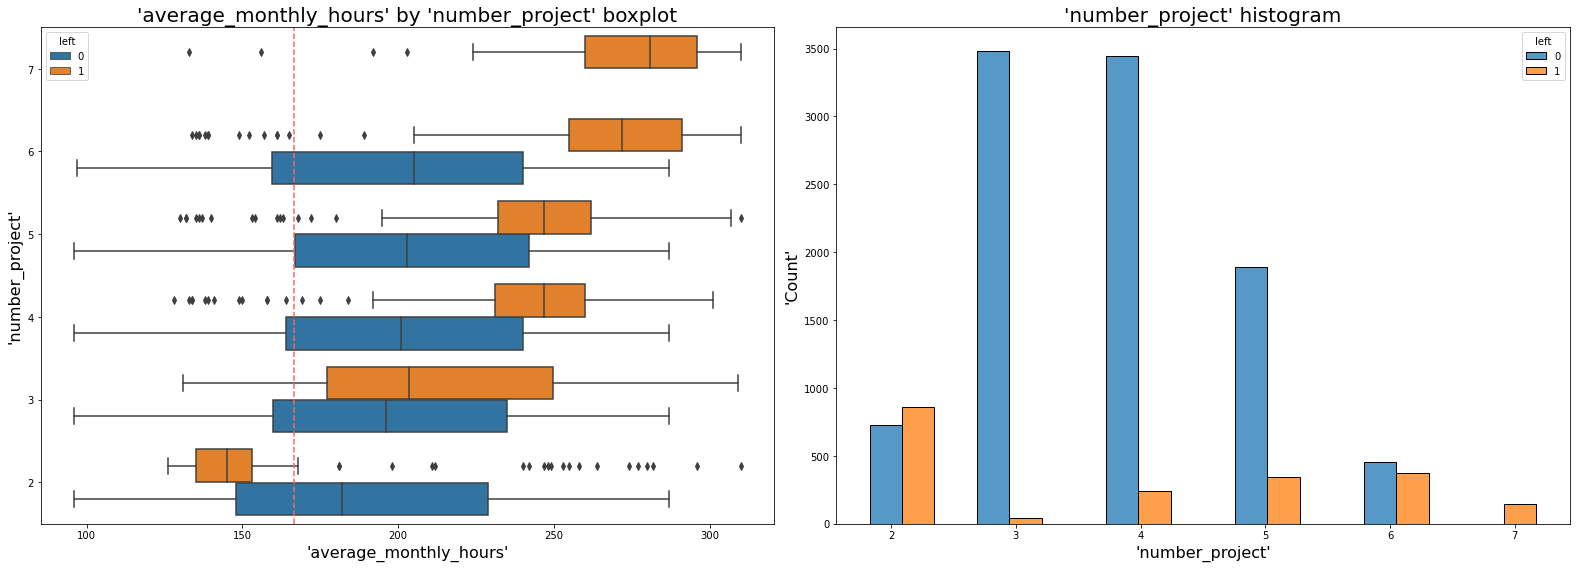

In [42]:
#plot_box_hist(df1, 'average_monthly_hours', 'number_project', 'left')

fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('\'average_monthly_hours\' by \'number_project\' boxplot', fontsize='20')
ax[0].axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
ax[0].set_xlabel('\'average_monthly_hours\'', fontsize='16')
ax[0].set_ylabel('\'number_project\'', fontsize='16')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=3, ax=ax[1])
ax[1].set_title('\'number_project\' histogram', fontsize='20')
ax[1].set_xlabel('\'number_project\'', fontsize='16')
ax[1].set_ylabel('\'Count\'', fontsize='16')

plt.tight_layout()
    
# Display the plots
plt.show()

Assuming employees get 2 weeks of vacation time per year.  40 hours per week * 50 weeks per year / 12 months = 166.67 working hours per month (including vacation).

201.050337 (mean of hours worked per month according to `.describe()`) - 166.67 = 34.380337 hours per month **over** the normal average 166.67 hours per month. This is indicated by the vertical line in the boxplot.

The boxplot shows a correlation between `average_monthly_hours` and `number_project`. The more projects an employee had, the longer they worked. The median, which is the black vertical line in the colored boxes, increases to the left as the number of projects increase for both stayed and left.

A possible scenario for `average_monthly_hours` at `number_project`=2 is that employees weren't willing to work more hours like their peers and decided to quit.

With the exception of `number_project`=2, the median and interquartile range of `average_monthly_hours` versus `number_project` for employees who left is higher than employees who stayed. This makes sense because overworked employees compared to their peers will tend to quit.

Aside from the employees who left that worked on 2 projects, every group is above 166.67 working hours per month. All employees with `number_project`=7 left the company. Employees with 6 projects who left had similar work hours to employees with 7 projects, which was about 250-290 hours per month.

The graph on the right shows the optimal number of projects for an employee is between 3-4 because the stayed to left ratio is really high.

Let's confirm that all employees with `number_project`=7 left.

In [43]:
df1[df1['number_project']==7]['left'].value_counts()

1    145
Name: left, dtype: int64

The code only shows `left`=145, which means all 145 employees with `number_project`=7 left.

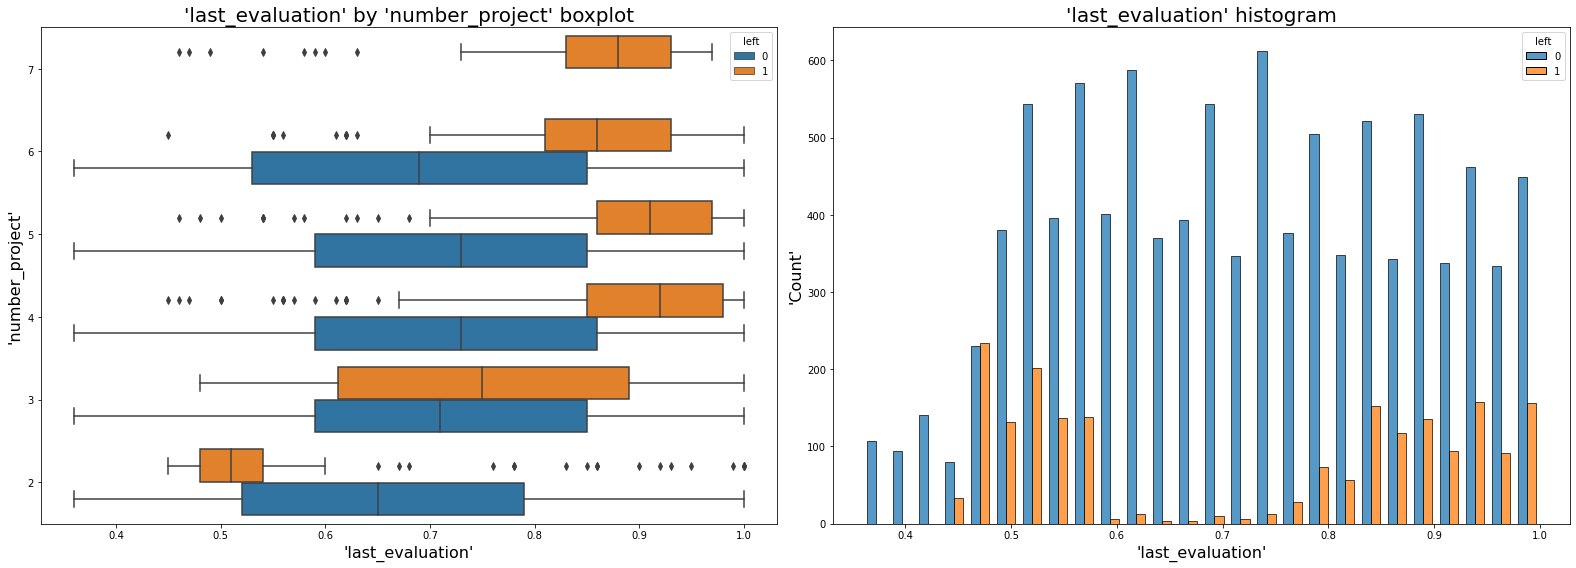

In [44]:
#plot_box_hist(df1, 'last_evaluation', 'number_project', 'left')

fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `last_evaluation` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='last_evaluation', y='number_project', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('\'last_evaluation\' by \'number_project\' boxplot', fontsize='20')
ax[0].set_xlabel('\'last_evaluation\'', fontsize='16')
ax[0].set_ylabel('\'number_project\'', fontsize='16')

# Create histogram showing distribution of `last_evaluation`, comparing employees who stayed versus those who left
sns.histplot(data=df1, x='last_evaluation', hue='left', multiple='dodge', shrink=0.7, ax=ax[1])
ax[1].set_title('\'last_evaluation\' histogram', fontsize='20')
ax[1].set_xlabel('\'last_evaluation\'', fontsize='16')
ax[1].set_ylabel('\'Count\'', fontsize='16')

plt.tight_layout()
    
# Display the plots
plt.show()

With the exception of `number_project`=2, employees that left had higher evaluation scores compared to employees that stayed. It's possible those employees didn't put in the amount of work hours as their peers which led to low evaluation scores.

Employees with 4 or more projects that left had great evaluation scores. Their lowest mean score is about 0.85 out of 1.0 with the highest at about 0.91.

There is a bimodal distribution among the employees that `left`. The left and right sides of the histogram each have distinct peaks.

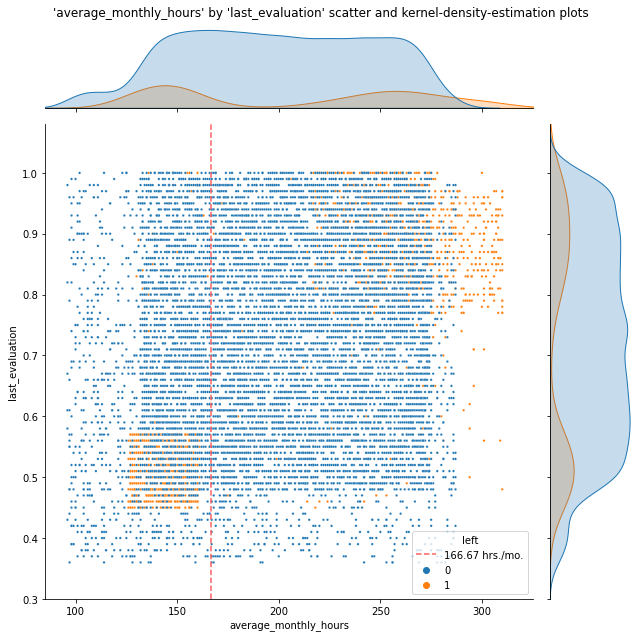

In [45]:
# Create scatterplot of `average_monthly_hours` versus `last_evaluation`, comparing employees who stayed versus those who left
#plot_scatter(df1, 'average_monthly_hours', 'last_evaluation', 'left')

fig = sns.jointplot(x='average_monthly_hours', y='last_evaluation', hue='left', data=df1, s=6,
              height=9, xlim=(85, 325), ylim=(0.3, 1.08))
plt.suptitle('\'average_monthly_hours\' by \'last_evaluation\' scatter and kernel-density-estimation plots')
fig.ax_joint.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', linestyle='--')
plt.subplots_adjust(top=0.95)
handles, labels = fig.ax_joint.get_legend_handles_labels()
fig.ax_joint.legend(handles=handles, labels=['166.67 hrs./mo.', '0', '1'], title='left')
plt.show()

There is a strong distinction between two groups of employees who left, one group worked about 125-160 hours per month and the other worked about 220-320 hours per month.

The group who worked about 125-160 received low `last_evaluation` scores. Again, it's possible that this group might be pressured to work more to keep up with their progress on their project, but feel demoralized because they don't want to work that many hours, thus underperforming.

The other group who worked about 220 to 320 hours per month must be tired from being overworked, thus leading to them leaving the company.

More hours work does not necessarily mean a higher `last_evaluation` score for the poplulation, but if we look specifically at `left`, then there is a correlation. For employees that `left`, the higher the `average_monthly_hours` the higher their `last_evaluation` is.

A thing of note is that the scatter points have a strange distribution. The `average_monthly_hours` for employees that `left` has a bimodal distribution, meaning it has 2 peaks, in histogram shown at the top of the graph. The histogram on the right for `last_evaluation` for employees that `left` also has a bimodal distribution.

Reasons for bimodal distribution include possible measurement errors (or differences) and/or distinct groups with different values being measured. These will affect the outcome of some models. Decision trees and Random Forests do not require normal distribution so will consider using these two machine learning algorithms later.

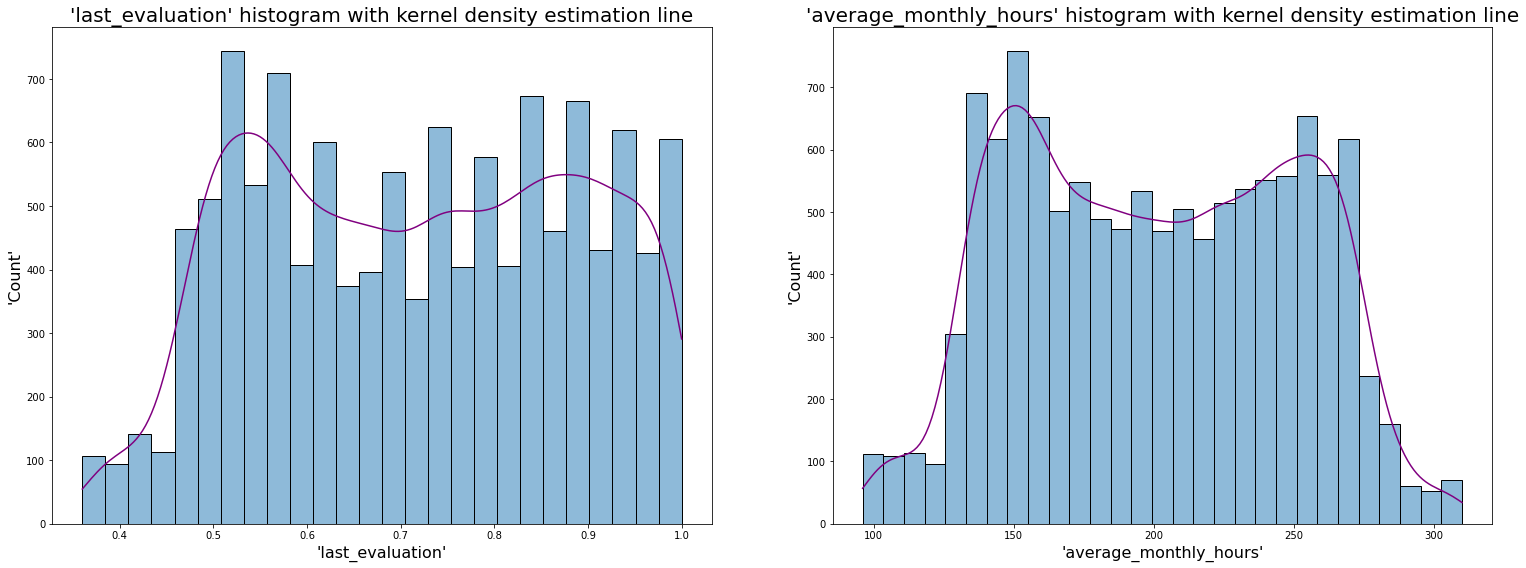

In [46]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Histogram and kernel density estimation line for `last evaluation`
sns.histplot(data=df1['last_evaluation'], kde=True, ax=ax[0])
ax[0].set_title('\'last_evaluation\' histogram with kernel density estimation line', fontsize='20')
ax[0].set_xlabel('\'last_evaluation\'', fontsize='16')
ax[0].set_ylabel('\'Count\'', fontsize='16')
ax[0].lines[0].set_color('purple')

# Histogram and kernel density estimation line for `average_monthly_hours`
sns.histplot(data=df1['average_monthly_hours'], kde=True, ax=ax[1])
ax[1].set_title('\'average_monthly_hours\' histogram with kernel density estimation line', fontsize='20')
ax[1].set_xlabel('\'average_monthly_hours\'', fontsize='16')
ax[1].set_ylabel('\'Count\'', fontsize='16')
ax[1].lines[0].set_color('purple')

plt.tight_layout()
    
# Display the plots
plt.show()

Larger plots of the bimodal distribution for the histograms for `last_evaluation` and `average_monthly_hours`.

`last_evaluation` has peak values at about 0.52 and 0.88 while `average_monthly_hours` has peak values at about 145 and 255.

Again, tree based models do not require normal distribution so they will be able to work with bimodality. If we decide to use a different type of classification algorithm, then we might have to take bimodality into consideration.

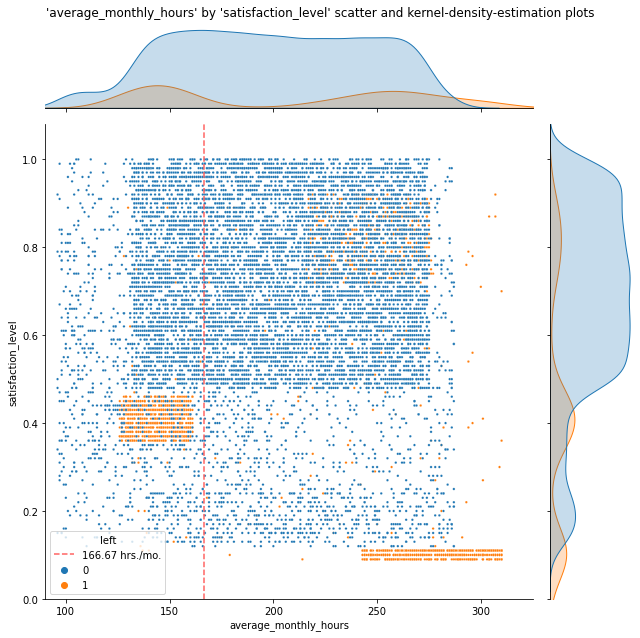

In [47]:
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
#plot_scatter(df1, 'average_monthly_hours', 'satisfaction_level', 'left')

fig = sns.jointplot(x='average_monthly_hours', y='satisfaction_level', hue='left', data=df1, s=6, height=9,
              xlim=(90, 325), ylim=(0, 1.08))
plt.suptitle('\'average_monthly_hours\' by \'satisfaction_level\' scatter and kernel-density-estimation plots')
fig.ax_joint.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', linestyle='--')
plt.subplots_adjust(top=0.95)
handles, labels = fig.ax_joint.get_legend_handles_labels()
fig.ax_joint.legend(handles=handles, labels=['166.67 hrs./mo.', '0', '1'], title='left')
plt.show()

There are 3 grouping for employees that left for this comparison. The first group worked approximately 125-165 hours with a `satisfaction_level` of about 0.4. The second group worked approximately 240-320 hours with a `satisfaction_level` of about 0.1. The final group worked approximately 220-275 hours with a `satisfaction_level` of about 0.8.

Overworking did not correspond with a low `satisfaction_level` indicated by Group 2. Group 3, who were overworked and left, reported high `satisfaction_level`. **We need more information to infer the reasoning behind this phenomenon.**

A thing of note again is that the scatter points have a strange distribution. The histogram for `satisfaction_level` for employees that left (right side) is multimodal with 3 maximum peaks. This could be 3 distinct populations joined in the dataset. `satisfaction_level` for employees that stayed seem to be bimodal with 2 peaks.

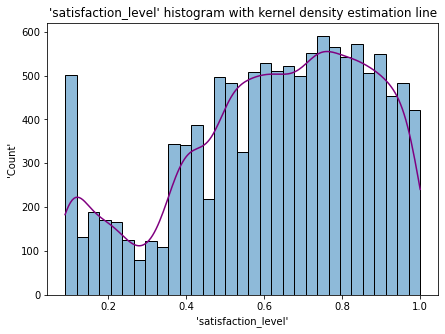

In [48]:
# Histogram and kernel density estimation line for `satisfaction_level`
plt.figure(figsize=(7, 5))
ax = sns.histplot(data=df1['satisfaction_level'], kde=True)
ax.set_title('\'satisfaction_level\' histogram with kernel density estimation line', fontsize='12')
ax.set_xlabel('\'satisfaction_level\'', fontsize='10')
ax.set_ylabel('\'Count\'', fontsize='10')
ax.lines[0].set_color('purple')

Larger plot of the multimodal distribution for the histogram of `satisfaction_level`.

There are peaks at about 0.53, 0.75, and 0.88.

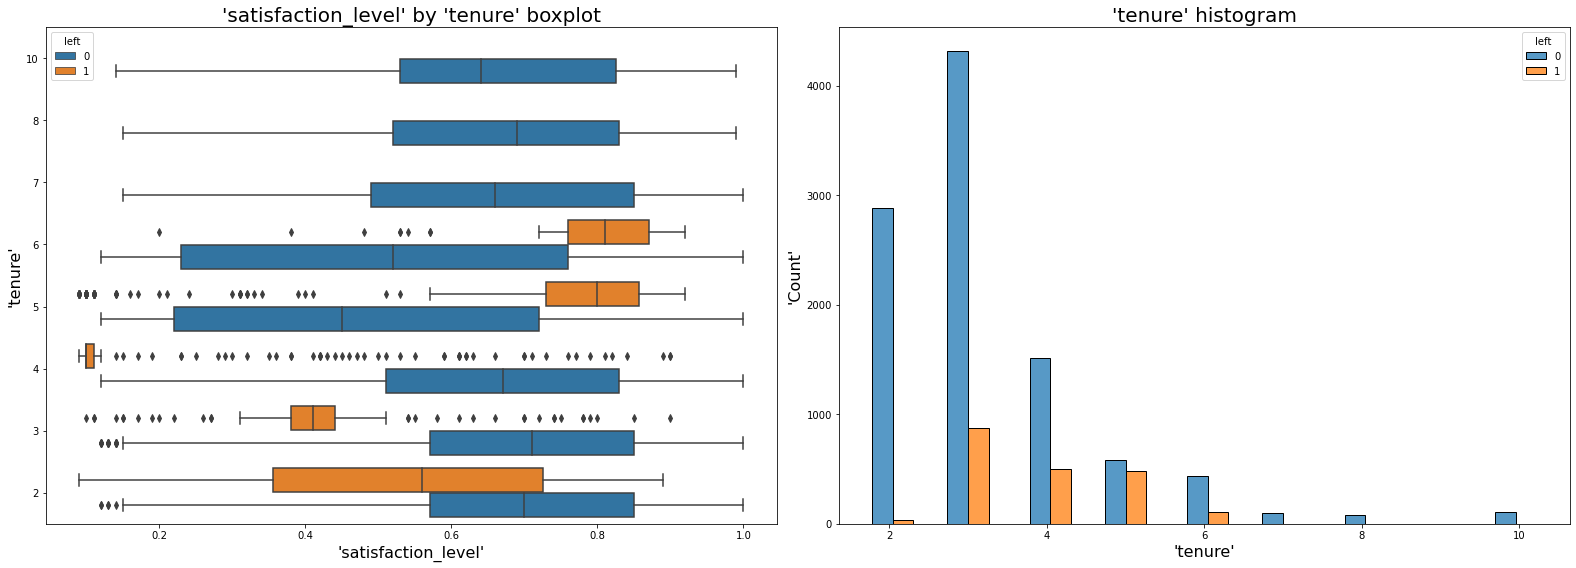

In [49]:
#plot_box_hist(df1, 'last_evaluation', 'number_project', 'left')

fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `satisfaction_level` distributions for `tenure`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('\'satisfaction_level\' by \'tenure\' boxplot', fontsize='20')
ax[0].set_xlabel('\'satisfaction_level\'', fontsize='16')
ax[0].set_ylabel('\'tenure\'', fontsize='16')

# Create histogram showing distribution of `last_evaluation`, comparing employees who stayed versus those who left
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=6, ax=ax[1])
ax[1].set_title('\'tenure\' histogram', fontsize='20')
ax[1].set_xlabel('\'tenure\'', fontsize='16')
ax[1].set_ylabel('\'Count\'', fontsize='16')

plt.tight_layout()
    
# Display the plots
plt.show()

The `satisfaction_level` of employees that left at `tenure`<=4 were all lower than for employees that stayed, which seems logical. However, for `tenure`=5 and 6, the `satisfaction_level` for those employees is way above the norm.

`tenure`=4 of employees that left seem to have an unusually low `satisfaction_level`. The change from `tenure` 4 to 5 went drastically from the low end of `satisfaction_level` to the high end. Did something change in the company that might have caused this? `tenure`=5 had the highest proportion of employees leaving at 45.4%

The plots show that employees with `tenure`=5 and 6 that stayed were not as satisfied as other employees as other `tenure`. This would be another point of interest to look into with more information.

No one at `tenure`=7-10 left the company. Most of the employees that stayed have been working 2-4 years at the company.

In [50]:
# Calculate mean and median `tenure` of employees who left and those who stayed
df1.groupby(['left'])['tenure'].agg([np.mean,np.median])

mean  median
left                  
0     3.262000     3.0
1     3.881467     4.0

The mean length of `tenure` for employees that left is about 3.88 years with a median of 4.0. The mean being less than the median indicates that the plot is skewed right.

In [51]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

mean  median
left                  
0     0.667365    0.69
1     0.440271    0.41

The mean `satisfaction_level` score for employees that left (0.44) is lower than for employess that stayed (0.67).

In [52]:
df1[df1['tenure']==5]['left'].value_counts(normalize=True)*100

0    54.613936
1    45.386064
Name: left, dtype: float64

45.4% of employees left at `tenure`=5, which is the highest proportion at any `tenure`.

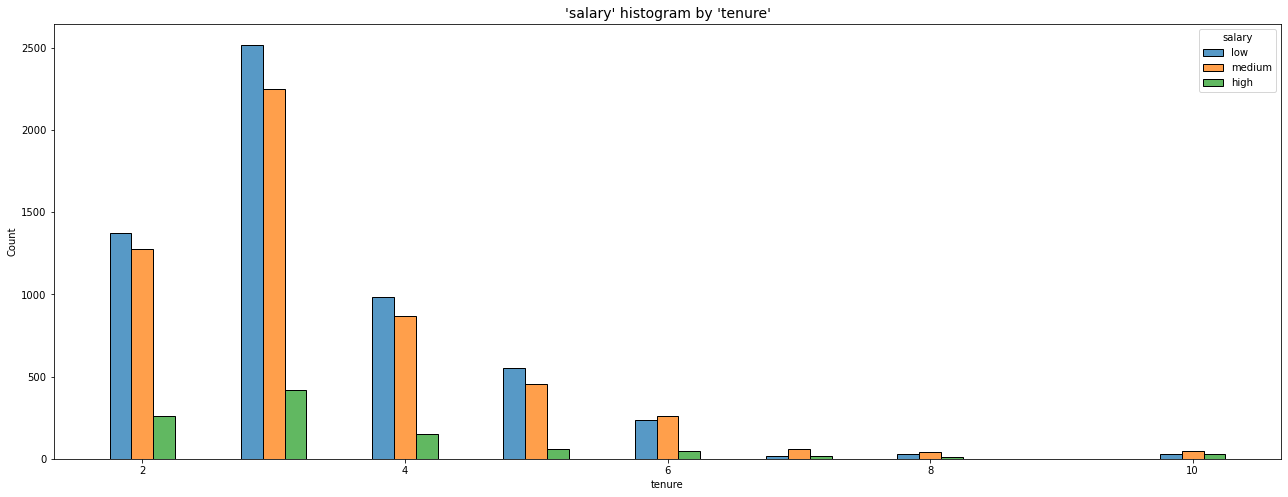

In [53]:
# Set figure and axes
plt.figure(figsize = (22,8))

# Plot tenured histogram
ax = sns.histplot(data=df1, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5)
plt.title('\'salary\' histogram by \'tenure\'', fontsize='14')
plt.show()

The plot above shows that not all short-term employees had low `salary` and not all long-term employees had high `salary`.

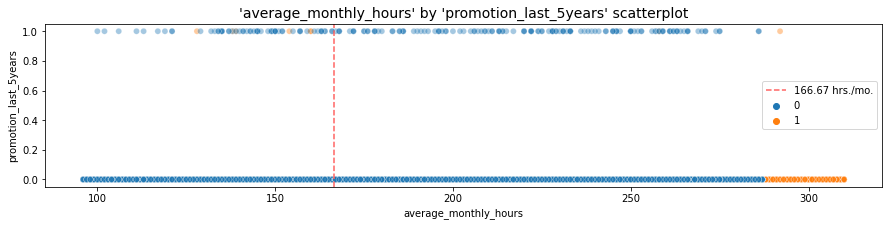

In [54]:
# Create scatterplot of `average_monthly_hours` versus `promotion_last_5years`, comparing employees who stayed versus those who left
#plot_scatter(df1, 'average_monthly_hours', 'promotion_last_5years', 'left')

plt.figure(figsize=(15, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend()
plt.title('\'average_monthly_hours\' by \'promotion_last_5years\' scatterplot', fontsize='14');
plt.show()

There weren't many `promotion_last_5years` for both employees that left and stayed. The employees that left had some of the highest `average_monthly_hours`.

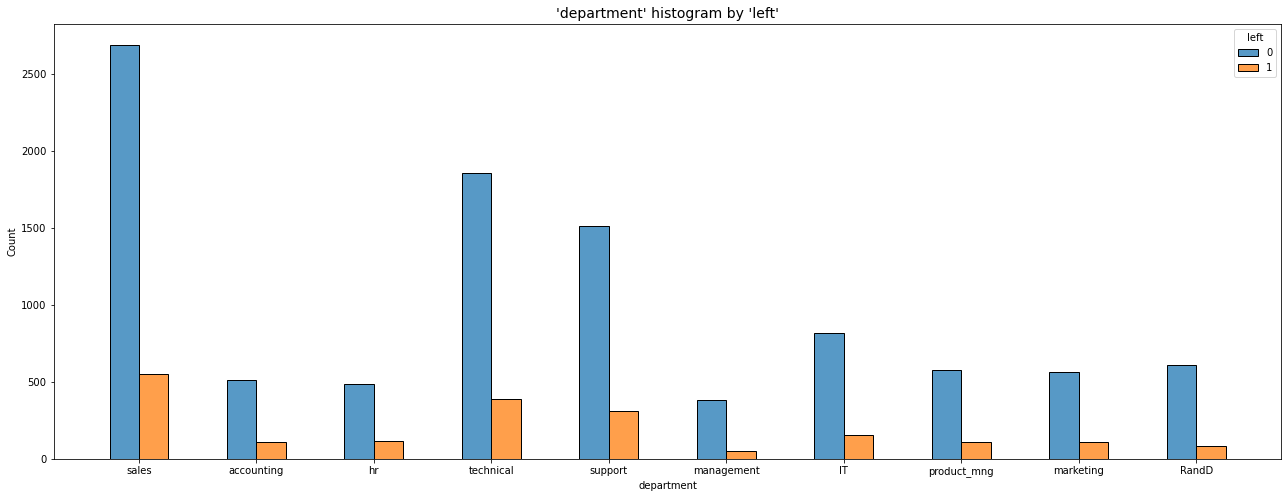

In [55]:
# Set figure and axes
plt.figure(figsize = (22,8))

# Plot department histogram
ax = sns.histplot(data=df1, x='department', hue='left', discrete=1, multiple='dodge', shrink=.5)
plt.title('\'department\' histogram by \'left\'', fontsize='14')
plt.show()

The proportion of employees that left or stayed is similar for every `department`.

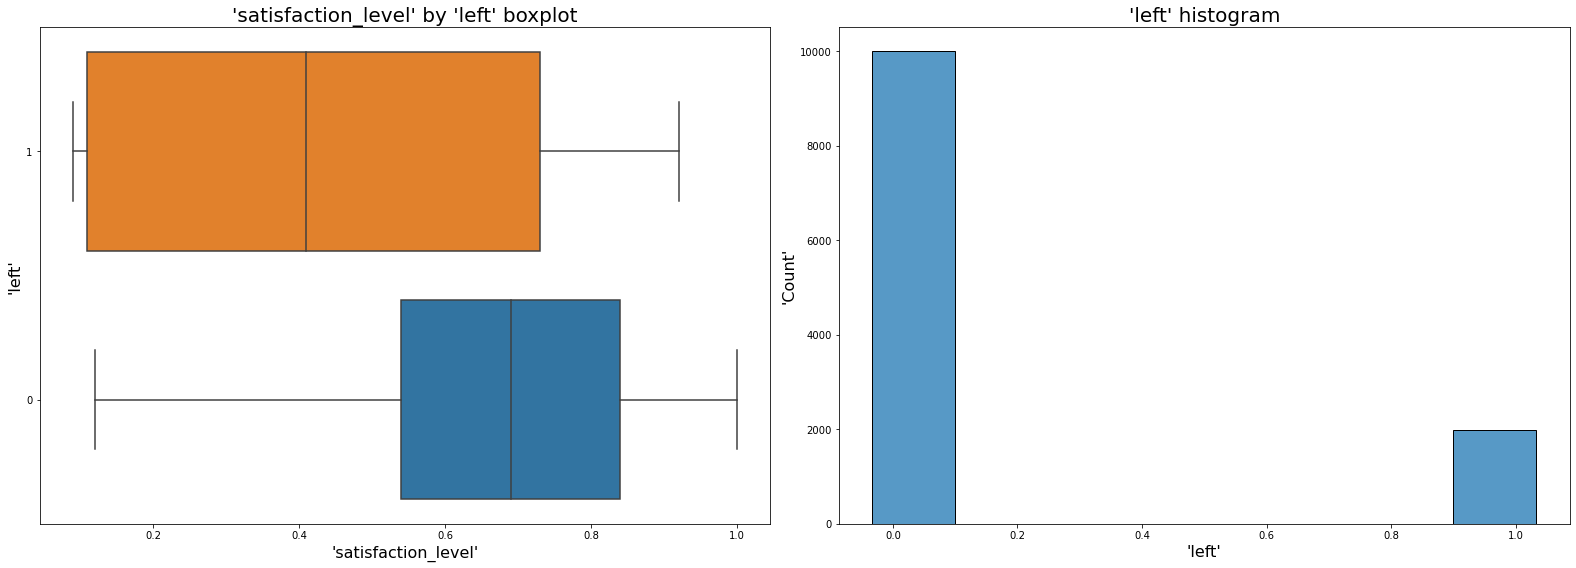

In [56]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `satisfaction_level` distributions for `left`
sns.boxplot(data=df1, x='satisfaction_level', y='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('\'satisfaction_level\' by \'left\' boxplot', fontsize='20')
ax[0].set_xlabel('\'satisfaction_level\'', fontsize='16')
ax[0].set_ylabel('\'left\'', fontsize='16')

# Create histogram showing distribution of `left`
sns.histplot(data=df1, x='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('\'left\' histogram', fontsize='20')
ax[1].set_xlabel('\'left\'', fontsize='16')
ax[1].set_ylabel('\'Count\'', fontsize='16')

plt.tight_layout()
    
# Display the plots
plt.show()

Data leakage can be caused by having the outcome variable, y (`left`), be highly correlated to a feature X. The correlation heatmap earlier above shows `left` and `satisfaction_level` at -0.39. The heatmap range is [-1 to 1] so -0.39 shows moderate correlation.

The boxplot above shows employees having a low `satisfaction_level` who `left`. Or could it be that they `left` because they had low `satisfaction_level`? Reporting low `satisfaction_level` after leaving can also cause data leakage, which could cause the machine learning model to not perform well on new data.

In the future, we should consider dropping `satisfaction_level` from the prediction variables list to determine if we get a better performing model.

### Insights

Being overworked with a high volume of projects can lead to burnout of employees, thus quite possibly making them leave the company. The optimal amount of projects should be 3-4 per employee.

Consider promoting more employees for their dedication and hard work. Employees don't want to be stuck in a job that offers no growth.

The largest amount of employees leave at 3 years of tenure, but the largest proportion (45.5%) leave at 5 years. More information is needed to determine the cause of this.

`satisfaction_level`, `last_evaluation`, and `average_monthly_hours` have multimodal distrubtions that might be caused by different measurement protocols and/or distinct groups with different values being measured. We will need to check with how, when, and what procedures were taken when the surveys were given.

Promotions, less projects, and shorter work hours could lead to more motivated employees to achieve better evaluations scores by performing better, thus leading to higher satisfaction scores and staying with the company.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

We want to predict whether an employee will leave or stay at the company. `left` will be the target variable with 1 indicating that the employee will leave or 0 indicating that the employee will stay. The variable has a categorical outcome of either 1 or 0, so it will involve using binary classification.

### Identify the types of models most appropriate for this task.

Logistic regression and tree-based machine learning will be the models used. Tree-based machine learning does not require normal distribution so it it will be able to give a suitable performing model despite the dataset having multimodal distributions in `satisfaction_level`, `last_evaluation`, and `average_monthly_hours`.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [57]:
df1.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
tenure                     int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

**Target variable:**
- `left`

**Independent variables:**
- `satisfaction_level`  
- `last_evaluation`  
- `number_project`  
- `average_monthly_hours`  
- `tenure`  
- `work_accident`  
- `promotion_last_5years`  
- `department`  
- `salary`

`department` and `salary` are non-numerical variables so we will need to encode them.

In [58]:
df1['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [59]:
df1['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

`salary` looks to be ordinal so we will need to categorize and assign order 0-2 to this variable .

In [60]:
# Copy the dataframe
df_enc = df1.copy()

In [61]:
# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, columns=['department'])

In [62]:
# Encode the `salary` column as ordinal numeric values
df_enc['salary'] = df_enc['salary'].map({
                                        'low': 0,
                                        'medium': 1,
                                        'high': 2,
                                        })
df_enc['salary'] = df_enc['salary'].astype('uint8')

In [63]:
df_enc.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0              0   
1       6              0     1                      0       1              0   
2       4              0     1                      0       1              0   
3       5              0     1                      0       0              0   
4       3              0     1                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0

In [64]:
df_enc.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_monthly_hours       int64
tenure                      int64
work_accident               int64
left                        int64
promotion_last_5years       int64
salary                      uint8
department_IT               uint8
department_RandD            uint8
department_accounting       uint8
department_hr               uint8
department_management       uint8
department_marketing        uint8
department_product_mng      uint8
department_sales            uint8
department_support          uint8
department_technical        uint8
dtype: object

### 1. Logistic regression

The first model we will use is binomial logistic regression since our task involves binary classification.

#### Heatmap

We'll visualize the correlation between variables using a heatmap.

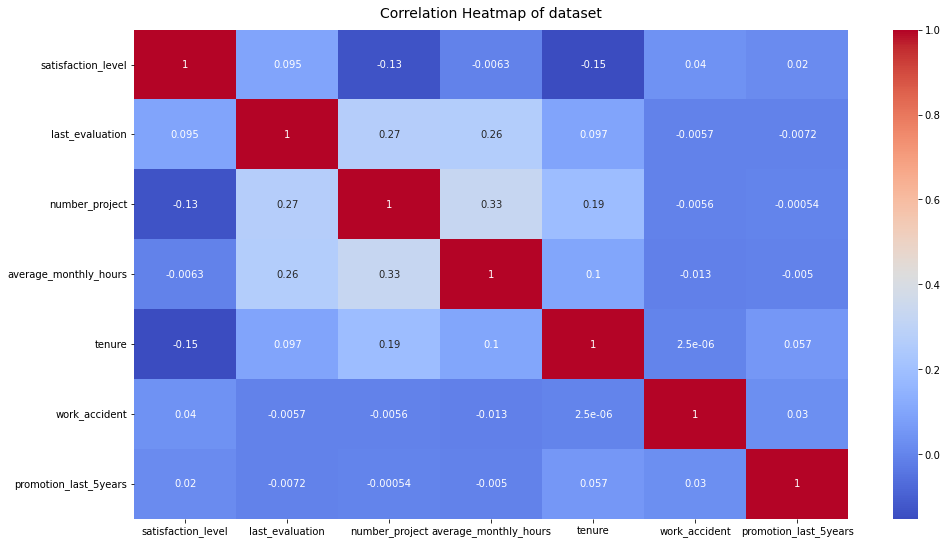

In [65]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project',
                              'average_monthly_hours', 'tenure', 'work_accident', 'promotion_last_5years'
                            ]].corr(), annot=True, cmap=sns.color_palette('coolwarm', as_cmap=True))
heatmap.set_title('Correlation Heatmap of dataset', fontdict={'fontsize':14}, pad=12);
plt.show()

#### Outliers

Earlier, we found that there were outliers in `tenure`. Let's revisit that plot.

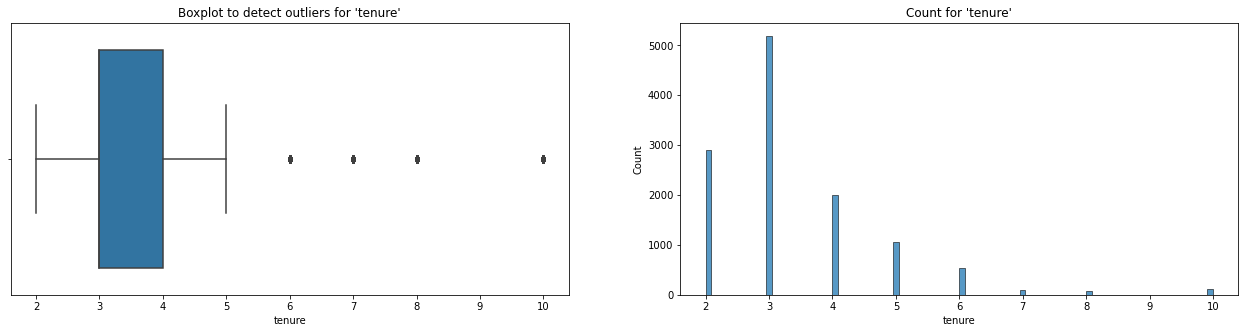

In [66]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
outliers_boxplot_count(df_enc['tenure'])

Logistic regression is sensitive to outliers so we're going to exclude the rows with outliers from the `tenure` column.

In [67]:
# Check for outliers for 'tenure'
outliers_check(df_enc, 'tenure')

Lower limit for 'tenure': 1.5
Upper limit for 'tenure': 5.5
Number of rows in the data containing outliers in 'tenure': 824


In [68]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_lr = outliers_handle(df_enc, 'tenure')

In [69]:
# Confirm correct number of rows were removed
df_enc.shape[0] - df_lr.shape[0]

824

In [70]:
df_lr.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0              0   
2       4              0     1                      0       1              0   
3       5              0     1                      0       0              0   
4       3              0     1                      0       0              0   
5       3              0     1                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0  
5                 1                   0                     0

In [71]:
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11167 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11167 non-null  float64
 1   last_evaluation         11167 non-null  float64
 2   number_project          11167 non-null  int64  
 3   average_monthly_hours   11167 non-null  int64  
 4   tenure                  11167 non-null  int64  
 5   work_accident           11167 non-null  int64  
 6   left                    11167 non-null  int64  
 7   promotion_last_5years   11167 non-null  int64  
 8   salary                  11167 non-null  uint8  
 9   department_IT           11167 non-null  uint8  
 10  department_RandD        11167 non-null  uint8  
 11  department_accounting   11167 non-null  uint8  
 12  department_hr           11167 non-null  uint8  
 13  department_management   11167 non-null  uint8  
 14  department_marketing    11167 non-null

#### Split data

Assign outcome variable.

In [72]:
# Isolate outcome (target) variable
y = df_lr['left']

Select features for the model that will help predict `left`.

In [73]:
# Select the features used in the model
X = df_lr.drop('left', axis=1)

Split the data into training (75%) and testing (25%) sets. Stratify based on the values in y, since the classes are unbalanced.

In [74]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Confirm shape of new sets is correct.

In [75]:
# Confirm shape of new sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8375, 18), (2792, 18), (8375,), (2792,))

#### Build logisic regression model

In [76]:
%%time

# Construct a logistic regression model and fit it to the training dataset
# -----> Wall time ~25 seconds
clf_log = LogisticRegression(random_state=42, max_iter=500, verbose=1).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 33.2 s, sys: 34.8 s, total: 1min 7s
Wall time: 34 s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   33.9s finished


In [77]:
# Use the logistic regression model to get predictions on the encoded testing set
y_pred_lr = clf_log.predict(X_test)

#### Display confusion matrix for logistic regression

In [78]:
# Create function to plot confusion matrix
def conf_matrix_plot(model, x_data, y_data, model_name):
    '''
    Accepts as argument model object, X data (test or validate), y data (test or validate), and model name (string)
    Returns a plot of confusion matrix for predictions on y data.
    ''' 
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
  
    disp.plot(values_format='')
    plt.title(str(model_name));
    plt.show()

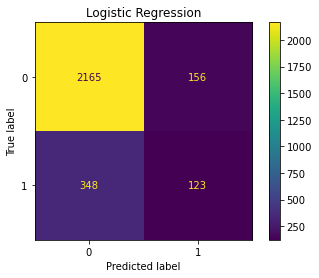

In [79]:
# Display confusion matrix for logistic regression
conf_matrix_plot(clf_log, X_test, y_test, 'Logistic Regression')

- The upper-left quadrant displays the number of True Negatives: the number of people who did not leave that the model accurately predicted did not leave.

- The upper-right quadrant displays the number of False Positives: the number of people who did not leave the model inaccurately predicted as leaving.

- The lower-left quadrant displays the number of False Negatives: The number of people who left that the model inaccurately predicted did not leave.

- The lower-right quadrant displays the number of True Positives: the number of people who left the model accurately predicted as leaving.

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

Check the class balance in the data. In other words, check the value counts in the `left` column. Since this is a binary classification task, the class balance informs the way you interpret accuracy metrics.

In [80]:
df_lr['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

There is an approximately 83%-17% split. The data is not perfectly balanced, but it is not too imbalanced. If it was more severely imbalanced, which occurs at 90%, the data would need to be resampled to make it more balanced. In this case, we can continue evaluating the model.

#### Create classification report for logistic regression

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [83]:
# Create a classification report
target_labels = ['stayed', 'left']
cr_log = classification_report(y_test, y_pred_lr, target_names=target_labels, digits=6)

# Display classification report results
print(cr_log)

              precision    recall  f1-score   support

      stayed   0.861520  0.932788  0.895739      2321
        left   0.440860  0.261146  0.328000       471

    accuracy                       0.819484      2792
   macro avg   0.651190  0.596967  0.611869      2792
weighted avg   0.790556  0.819484  0.799963      2792



In [84]:
# Get evaluation statistics

# Get precision score
pc_lr = precision_score(y_test, y_pred_lr)
#print('The precision score is {pc:.6f}'.format(pc=pc_lr))

# Get recall score
rc_lr = recall_score(y_test, y_pred_lr)
#print('The recall score is {rc:.6f}'.format(rc=rc_lr))

# Get accuracy score
ac_lr = accuracy_score(y_test, y_pred_lr)
#print('The accuracy score is {ac:.6f}'.format(ac=ac_lr))

# Get F1 score
f1_lr = f1_score(y_test, y_pred_lr)
#print('The F1 score is {f1:.6f}'.format(f1=f1_lr))

# Get ROC AUC score
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)
#print('The ROC AUC score is {roc_auc:.6f}'.format(roc_auc=roc_auc_lr))

In [85]:
# Create dataframe with statistics
results_lr = pd.DataFrame()
results_lr = pd.DataFrame({'Model': 'Logistic Regression',
                        'Precision': [pc_lr],
                        'Recall': [rc_lr],
                        'F1': [f1_lr],
                        'Accuracy': [ac_lr],
                        'AUC': [roc_auc_lr]
                        })
results_lr

Model  Precision    Recall     F1  Accuracy       AUC
0  Logistic Regression    0.44086  0.261146  0.328  0.819484  0.596967

- Precision measures how many of the “positive” predictions made by the model were correct.

- Recall measures how many of the positive class samples present in the dataset were correctly identified by the model.

- Accuracy metric computes how many times a model made a correct prediction across the entire dataset.

- F1 score combines precision and recall using their harmonic mean, and maximizing the F1 score implies simultaneously maximizing both precision and recall.

The logistic regression model shows a precision of 44%, recall of 26%, accuracy of 82%, and F1 score of 33%. This model's performance is very underwhelming.  Let's look into tree-based machine learning to find a better model.

### 2. Tree-based machine learning

#### Split data

In [86]:
# Isolate outcome (target) variable
y = df_enc['left']

In [87]:
# Select the features used in the model
X = df_enc.drop('left', axis=1)

In [88]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [89]:
# Confirm shape of new sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8993, 18), (2998, 18), (8993,), (2998,))

#### A. Build decision tree model

Construct a decision tree model and set up cross-validated grid-search to exhaustively search for the best model parameters.

In [90]:
# Instantiate model
decision_tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to cross-validated over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [1, 2, 5],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
clf_dt = GridSearchCV(decision_tree, cv_params, scoring=scoring, cv=4, refit='roc_auc', verbose=1)

Fit the decision tree model to the training data.

In [91]:
%%time

# Fit the decision tree model to the training sets
clf_dt.fit(X_train, y_train) # -----> Wall time ~3 seconds

Fitting 4 folds for each of 36 candidates, totalling 144 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 2.93 s, sys: 0 ns, total: 2.93 s
Wall time: 2.93 s


[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    2.9s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [1, 2, 5],
                

Identify the optimal values for the decision tree parameters.

In [92]:
# Find best parameters
clf_dt.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

Identify the best Area Under the Curve (AUC) score of the model for the training data.

In [93]:
# Check best AUC score on CV
clf_dt.best_score_

0.969819392792457

The AUC score is really high (1.0 is the maximum), so it performs well in predicting if an employee will leave.

In [94]:
# Function that will extract all the scores from the grid search
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'Model': [model_name],
                          'Precision': [precision],
                          'Recall': [recall],
                          'F1': [f1],
                          'Accuracy': [accuracy],
                          'AUC': [auc]
                        })
  
    return table

Use the function just defined to get all the scores from grid search.

In [95]:
# Get all cross-validated scores
cv_results_dt = make_results('Decision Tree CV', clf_dt, 'auc')
cv_results_dt

Model  Precision    Recall        F1  Accuracy       AUC
0  Decision Tree CV   0.914552  0.916949  0.915707  0.971978  0.969819

In [96]:
# Combine new scores with results
cv_results = pd.concat([results_lr, cv_results_dt]).sort_values(by=['AUC'], ascending=False).reset_index(drop=True)

# Display results of new dataframe
cv_results

Model  Precision    Recall        F1  Accuracy       AUC
0     Decision Tree CV   0.914552  0.916949  0.915707  0.971978  0.969819
1  Logistic Regression   0.440860  0.261146  0.328000  0.819484  0.596967

All of these scores from the Decision Tree model are strong indicators of good model performance. 

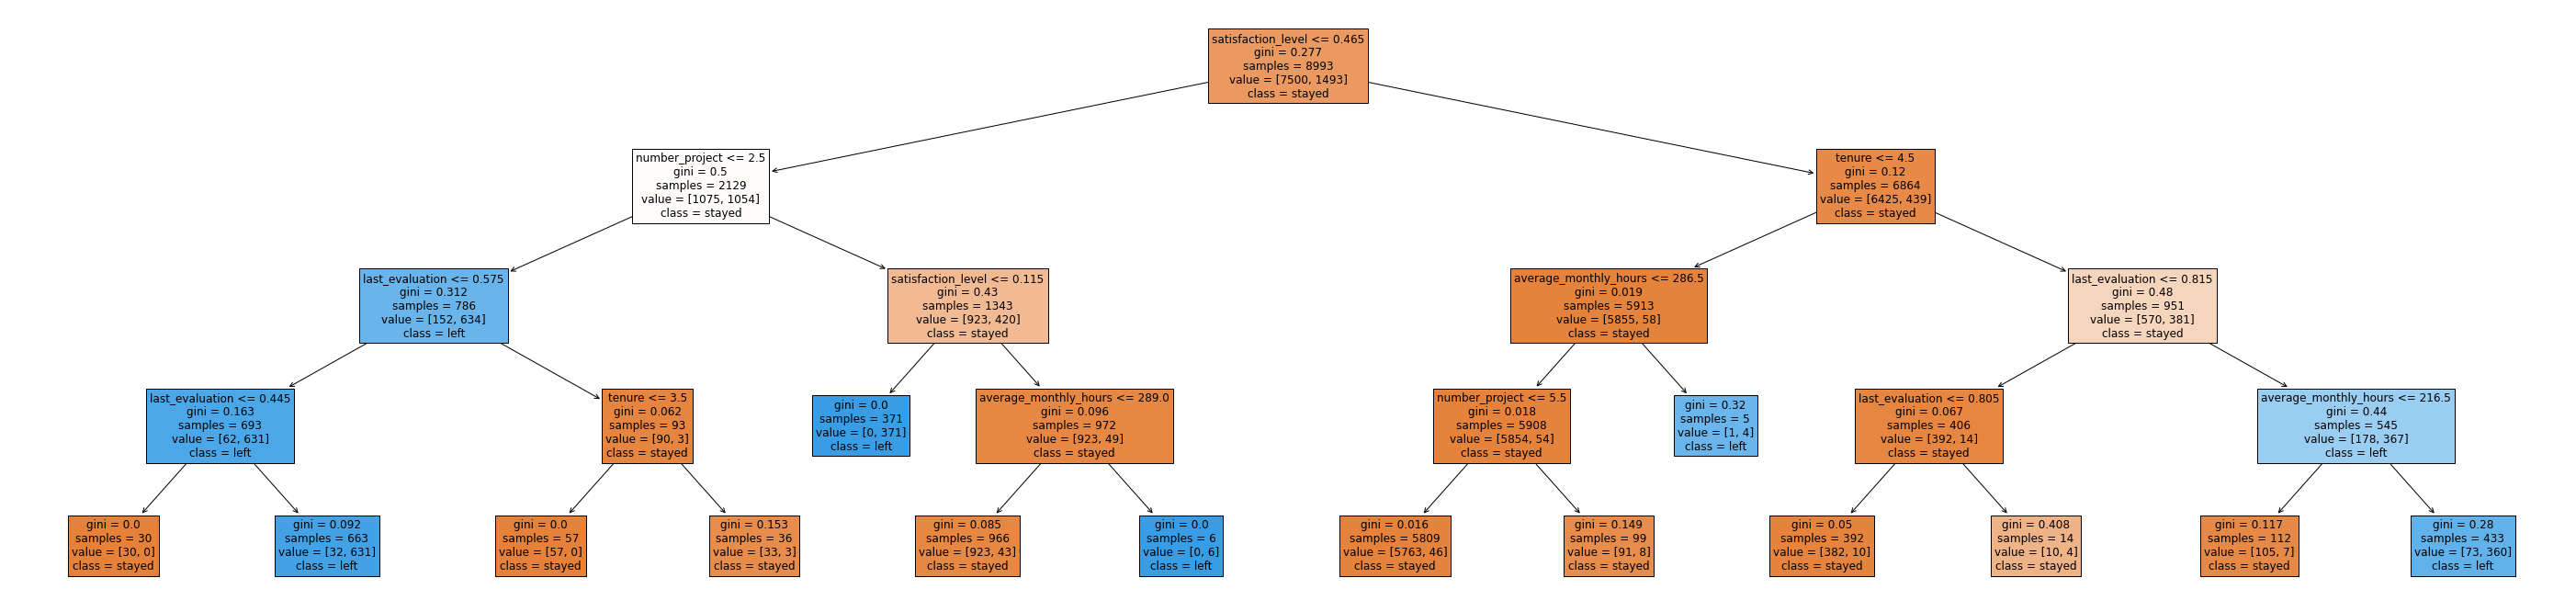

In [97]:
# Plot the tree
plt.figure(figsize=(50,12))
plot_tree(clf_dt.best_estimator_, max_depth=4, fontsize=12, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

Double-click on the tree image to zoom in on it and inspect the splits.

The first line of information in each node is the feature and split point that the model identified as being most predictive. In other words, this is the question that is being asked at that split. For our root node, the question was: _Is the employee satisfaction less than or equal to 0.465?_

At each node, if the answer to the question it asks is "yes," the sample would move to the child node on the left. If the answer is "no," the sample would go to the child node on the right.

`gini` refers to the node's _Gini impurity_. This is a way of measuring how "pure" a node is. The value can range from 0 to 0.5. A Gini score of 0 means there is no impurity&mdash;the node is a leaf, and all of its samples are of a single class. A score of 0.5 means the classes are all equally represented in that node.

`samples` is simply how many samples are in that node, and `value` indicates how many of each class are in the node. Returning to the root node, we have `value = [7500, 1493]`. Notice that these numbers sum to 8,993, which is the number of samples in the node. This tells us that 7,500 employees in this node stayed (y=0) and 1,493 employees left (y=1).

Lastly, we have `class`. This tells us the majority class of the samples in each node.

This plot tells us that, if we could only do a single split on a single variable, the one that would most help us predict whether an employee will leave is their `satisfaction_level`.

If we look at the nodes at depth one, we notice that `number_project` and `tenure` also are both strong predictors (relative to the features we have) of whether or not they will leave. 

It's worth noting that there is no single question that can be asked&mdash;for any feature&mdash;that would cause a majority of samples in one of the child nodes to be of class `left` (y=1). The tree must get to depth two (i.e., two questions must be asked) before this happens.

In [98]:
# Create function to find `feature_importances_` for model
def model_importances(model, x_data):
    '''
    Accepts as argument model object (best_estimator_), X data (test or validate). 
    Returns a dataframe of feature_importances.
    '''

    #df_importances = pd.DataFrame(model.best_estimator_.feature_importances_, columns=X.columns)
    df_importances = pd.DataFrame(model.feature_importances_, 
                                    columns=['gini_importance'], index=x_data.columns)
    
    df_importances = df_importances.sort_values(by='gini_importance', ascending=False)

    # Only extract the features with importances > 0
    df_importances = df_importances[df_importances['gini_importance'] != 0]
    return df_importances

Find `feature_importances_` of the Decision Tree model sorted by `gini`.

In [99]:
# Find `feature_importances`
dt_importances = model_importances(clf_dt.best_estimator_, X)

# Display `feature_importances`
dt_importances

gini_importance
satisfaction_level            0.524622
last_evaluation               0.178501
tenure                        0.120792
number_project                0.117102
average_monthly_hours         0.058983

In [100]:
def model_importances_plot(model, x_data):
    '''
    Accepts as argument model object, X data (test or validate). 
    Returns a plot of feature_importances.
    ''' 
    
    importances = model.feature_importances_

    forest_importances = pd.Series(importances, index=x_data.columns).sort_values(ascending=False)

    fig, ax = plt.subplots()
    ax.set_title('Feature Importances')
    ax.set_ylabel('Mean decrease in impurity')
    forest_importances.plot.bar(ax=ax);

Plot `feature_importances_` of the Decision Tree model.

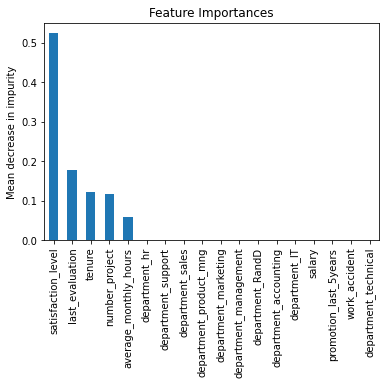

In [101]:
# Plot and display `feature_importances_` attribute relative to each feature
model_importances_plot(clf_dt.best_estimator_, X)

`satisfaction_level` is by far the most predictive feature for the Decision Tree model. Other features that relate to if an employee leaves are `last_evaluation`, `tenure`, `number_project`, and `average_monthly_hours`.

Decision trees can be vulnerable to overfitting, and random forests avoid overfitting by incorporating multiple trees to make predictions. Let's construct a random forest model next.

#### B. Build random forest model

Construct a random forest model and set up cross-validated grid-search to exhaustively search for the best model parameters.

In [102]:
# Instantiate model
random_forest = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3, 5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1, 2, 3],
             'min_samples_split': [2, 3, 4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
clf_rf = GridSearchCV(random_forest, cv_params, scoring=scoring, cv=4, refit='roc_auc', verbose=1)

Fit the random forest model to the training data.

In [103]:
%%time

# Fit the random forest model to the training sets
'''
UNCOMMENT line below if running for the FIRST time, then
RECOMMENT when done
'''
#clf_rf.fit(X_train, y_train) # -----> Wall time ~9.5 minutes

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs


'\nUNCOMMENT line below if running for the FIRST time, then\nRECOMMENT when done\n'

In [104]:
# Define a path to the folder of where to save the model
path = '/home/jovyan/work/'

In [105]:
# Define functions to pickle the model and read in the model.
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [106]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [107]:
# Write pickle
'''
UNCOMMENT line below if running for the FIRST time, then
RECOMMENT when done
'''
#write_pickle(path, clf_rf, 'hr_clf_rf')

'\nUNCOMMENT line below if running for the FIRST time, then\nRECOMMENT when done\n'

In [108]:
# Read pickle
clf_rf = read_pickle(path, 'hr_clf_rf')

Identify the best AUC score achieved by the random forest model on the training set.

In [109]:
# Check best AUC score on CV
clf_rf.best_score_

0.9804250949807172

Identify the optimal values for the parameters of the random forest model.

In [110]:
# Check best params
clf_rf.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

Collect the evaluation scores on the training set for the random forest model.

In [111]:
# Get all CV scores
cv_results_rf = make_results('Random Forest CV', clf_rf, 'auc')
cv_results_rf

Model  Precision    Recall        F1  Accuracy       AUC
0  Random Forest CV   0.950023  0.915614  0.932467  0.977983  0.980425

In [112]:
# Combine new scores with results
cv_results = pd.concat([cv_results, cv_results_rf]).sort_values(by=['AUC'], ascending=False).reset_index(drop=True)

# Display results of new dataframe
cv_results

Model  Precision    Recall        F1  Accuracy       AUC
0     Random Forest CV   0.950023  0.915614  0.932467  0.977983  0.980425
1     Decision Tree CV   0.914552  0.916949  0.915707  0.971978  0.969819
2  Logistic Regression   0.440860  0.261146  0.328000  0.819484  0.596967

The evaluation scores of the Random Forest model are better than those of the Decision Tree model, with the exception of recall (the recall score of the Random Forest model is approximately 0.001 lower, which is a negligible amount). This indicates that the Random Forest model mostly outperforms the Decision Tree model.

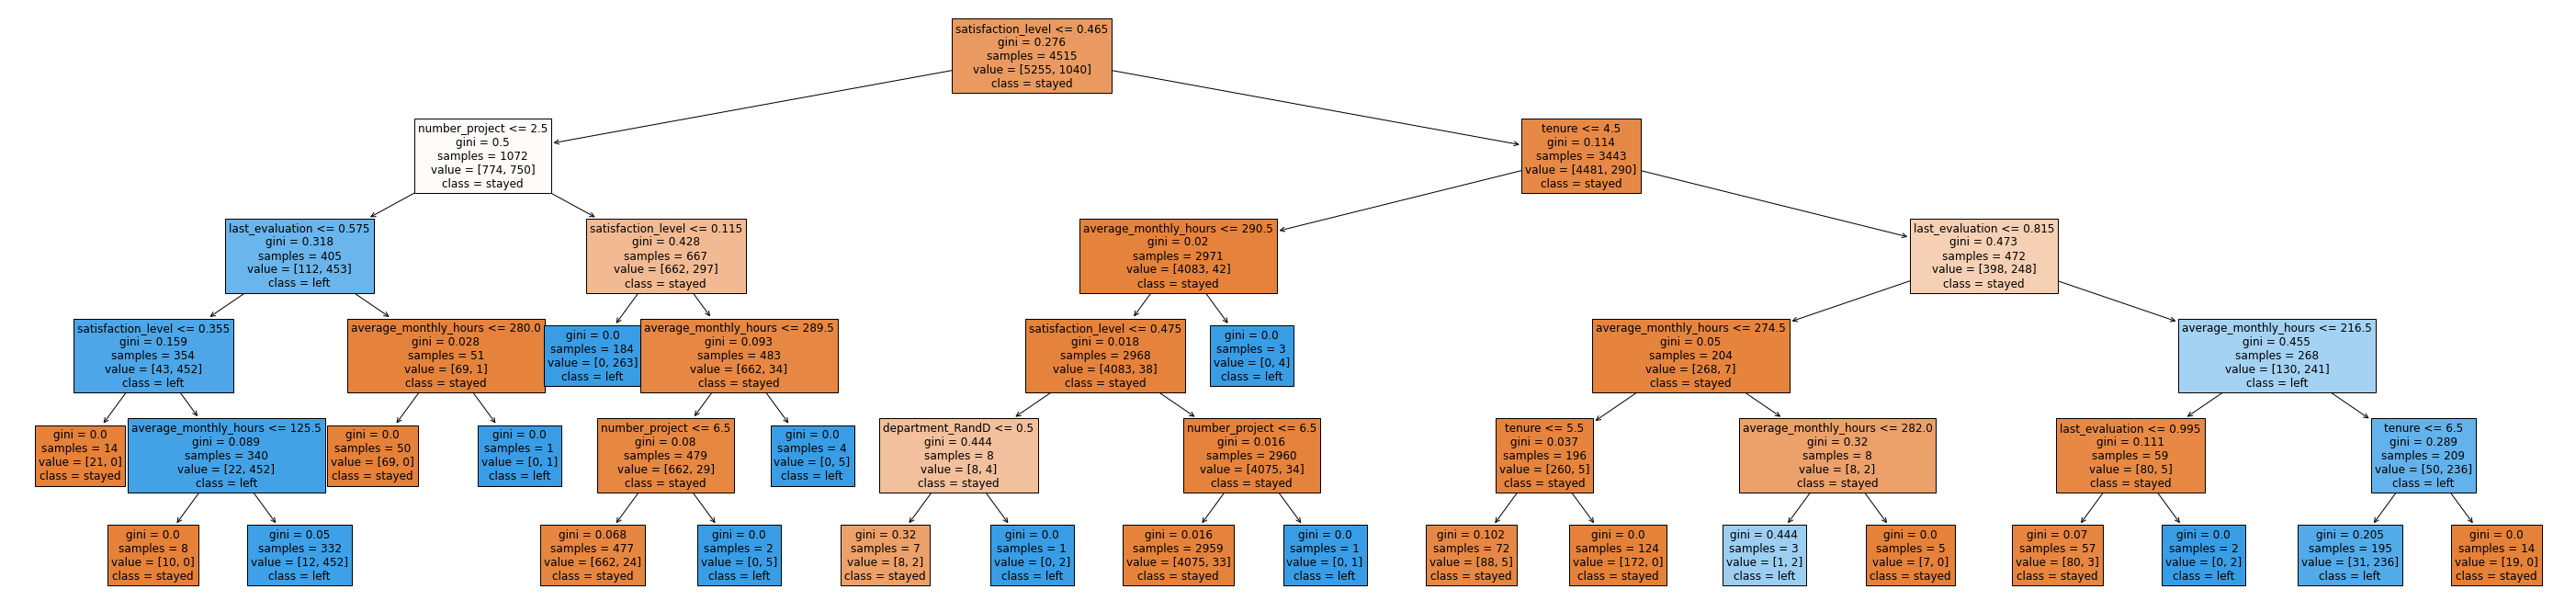

In [113]:
# Plot the tree
plt.figure(figsize=(50,12))
plot_tree(clf_rf.best_estimator_[0], max_depth=5, fontsize=12, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True)
plt.show()

Double-click on the tree image to zoom in on it and inspect the splits.

This plot tells us that when doing a single split on a single variable, the one that would most help us predict whether an employee will leave is again then `satisfaction_level`. `number_project` and `tenure` also are both strong predictors again.

Find `feature_importances_` of the Random Forest model sorted by `gini`.

In [114]:
# Find `feature_importances`
rf_importances = model_importances(clf_rf.best_estimator_[0], X)

# Display `feature_importances`
rf_importances

gini_importance
satisfaction_level            0.533382
last_evaluation               0.147890
tenure                        0.120581
number_project                0.120127
average_monthly_hours         0.076622
department_RandD              0.001397

Plot `feature_importances_` of the Random Forest model.

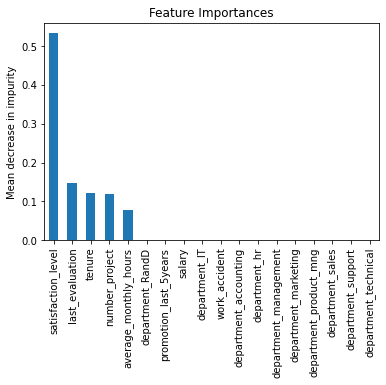

In [115]:
# Plot and display `feature_importances_` attribute relative to each feature
model_importances_plot(clf_rf.best_estimator_[0], X)

Using a random forest model, we again see that these are the predictive features: `satisfaction_level`, `last_evaluation`, `tenure`, `number_project`, and `average_monthly_hours`. `department_RandD` shows up but it is negligible.

Let's see if we can improve performance even further by using an XGBoost model.

#### C. Build XGBoost model

Construct an XGBoost model and set up cross-validated grid-search to search for the best model parameters.

In [116]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
#cv_params = {'max_depth': [4, 8, 12],
#                 'min_child_weight': [3, 5],
#                 'learning_rate': [0.01, 0.1],
#                 'n_estimators': [300, 500]
#                 }

cv_params = {'max_depth': [4, 6],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [5, 10, 15],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate the GridSearchCV object
clf_xgb = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='roc_auc', verbose=1)

Fit the XGBoost model to the training data.

In [117]:
%%time

# Fit the random forest model to the training sets
'''
UNCOMMENT line below if running for the FIRST time, then
RECOMMENT when done
'''
#clf_xgb.fit(X_train, y_train) # -----> Wall time ~15 seconds

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 9.3 µs


'\nUNCOMMENT line below if running for the FIRST time, then\nRECOMMENT when done\n'

In [118]:
# Write pickle
'''
UNCOMMENT line below if running for the FIRST time, then
RECOMMENT when done
'''
#write_pickle(path, clf_xgb, 'hr_clf_xgb')

'\nUNCOMMENT line below if running for the FIRST time, then\nRECOMMENT when done\n'

In [119]:
# Read pickle
clf_xgb = read_pickle(path, 'hr_clf_xgb')

Identify the best AUC score achieved by the XGBoost model on the training set.

In [120]:
# Check best AUC score on CV
clf_xgb.best_score_

0.9814922590589064

Identify the optimal values for the parameters of the XGBoost model.

In [121]:
# Check best params
clf_xgb.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.3,
 'max_depth': 6,
 'min_child_weight': 5,
 'n_estimators': 15,
 'subsample': 0.7}

Collect the evaluation scores on the training set for the XGBoost model.

In [122]:
# Get all CV scores
cv_results_xgb = make_results('XGBoost CV', clf_xgb, 'auc')
cv_results_xgb

Model  Precision    Recall       F1  Accuracy       AUC
0  XGBoost CV    0.97341  0.906898  0.93893  0.980429  0.981492

In [123]:
# Combine new scores with results
cv_results = pd.concat([cv_results, cv_results_xgb]).sort_values(by=['AUC'], ascending=False).reset_index(drop=True)

# Display results of new dataframe
cv_results

Model  Precision    Recall        F1  Accuracy       AUC
0           XGBoost CV   0.973410  0.906898  0.938930  0.980429  0.981492
1     Random Forest CV   0.950023  0.915614  0.932467  0.977983  0.980425
2     Decision Tree CV   0.914552  0.916949  0.915707  0.971978  0.969819
3  Logistic Regression   0.440860  0.261146  0.328000  0.819484  0.596967

The evaluation scores of the XGBoost model are better than those of the Random Forest model, with the exception of recall (the recall score of the XGBoost model is approximately 0.09 lower. This indicates that the XGBoost model mostly outperforms the Random Forest model.

This Python environment does not have the package `graphviz` installed so we are not able to plot the tree for the XGBoost model.

Find `feature_importances_` of the XGBoost model sorted by `gini`.

In [124]:
# Find `feature_importances`
xgb_importances = model_importances(clf_xgb.best_estimator_, X)

# Display `feature_importances`
xgb_importances

gini_importance
satisfaction_level            0.457480
number_project                0.170826
tenure                        0.157534
last_evaluation               0.091238
average_monthly_hours         0.076235
work_accident                 0.021453
salary                        0.014138
department_support            0.007353
department_sales              0.003743

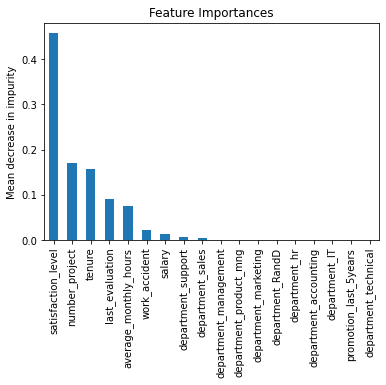

In [125]:
# Plot and display `feature_importances_` attribute relative to each feature
model_importances_plot(clf_xgb.best_estimator_, X)

# XGBoost has built in plot method to show `feature_importances`
#ax = plot_importance(clf_xgb.best_estimator_, importance_type='gain')
#fig = ax.figure
#fig.set_size_inches(10, 8)

Using an XGBoost model, we see that the main predictive features are there again but in different order: `satisfaction_level`, `number_project`, `tenure`, `last_evaluation`, and `average_monthly_hours`.

The new features that appear are: `work_accident`, `salary`, `department_support`, and `department_sales`.

### Use best performing model to predict on the test set

In [126]:
# function that gets all the scores from a model's predictions.
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'Model': [model_name],
                          'Precision': [precision], 
                          'Recall': [recall],
                          'F1': [f1],
                          'Accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

Next, evaluate the final model on the test set.

In [127]:
# Get predictions on test data
test_scores_xgb = get_scores('XGBoost (test)', clf_xgb, X_test, y_test)
test_scores_xgb

Model  Precision    Recall        F1  Accuracy       AUC
0  XGBoost (test)   0.976293  0.909639  0.941788  0.981321  0.952619

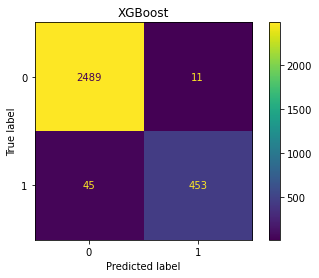

In [128]:
# Display confusion matrix for best performing model
conf_matrix_plot(clf_xgb, X_test, y_test, 'XGBoost')

Create classification report to confirm numbers.

In [129]:
# Use the XGBoost model to get predictions on the testing set
y_pred_xgb = clf_xgb.best_estimator_.predict(X_test)

In [130]:
# Create a classification report for XGBoost model
target_labels = ['stayed', 'left']
cr_best_model = classification_report(y_test, y_pred_xgb, target_names=target_labels, digits=6)

# Display classification report
print(cr_best_model)

              precision    recall  f1-score   support

      stayed   0.982242  0.995600  0.988876      2500
        left   0.976293  0.909639  0.941788       498

    accuracy                       0.981321      2998
   macro avg   0.979267  0.952619  0.965332      2998
weighted avg   0.981253  0.981321  0.981054      2998



In [131]:
# Combine new scores with results
cv_results = pd.concat([cv_results, test_scores_xgb]).sort_values(by=['AUC'], ascending=False).reset_index(drop=True)

# Display results of new dataframe
cv_results

Model  Precision    Recall        F1  Accuracy       AUC
0           XGBoost CV   0.973410  0.906898  0.938930  0.980429  0.981492
1     Random Forest CV   0.950023  0.915614  0.932467  0.977983  0.980425
2     Decision Tree CV   0.914552  0.916949  0.915707  0.971978  0.969819
3       XGBoost (test)   0.976293  0.909639  0.941788  0.981321  0.952619
4  Logistic Regression   0.440860  0.261146  0.328000  0.819484  0.596967

The XGBoost (test) scores are very similar to the XGBoost cross-validation (CV) scores, so this appears to be a strong model. Since the test set was only used for this model, we can be more confident that the model's performance on this data is representative of how it will perform on new, unseeen data.

## Feature Engineering

We might be skeptical of the high evaluation scores. There is a chance that there is some data leakage occurring. Data leakage is when we use data to train our model that should not be used during training, either because it appears in the test data or because it's not data that we'd expect to have when the model is actually deployed. Training a model with leaked data can give an unrealistic score that is not replicated in production.

In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the `average_monthly_hours` column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours. 

The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models. 

We will proceed by dropping `satisfaction_level` and creating a new feature that roughly captures whether an employee is overworked. We will call this new feature `overworked` and it will be a binary variable.

In [132]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df2 = df_enc.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe
df2.head()

last_evaluation  number_project  average_monthly_hours  tenure  \
0             0.53               2                    157       3   
1             0.86               5                    262       6   
2             0.88               7                    272       4   
3             0.87               5                    223       5   
4             0.52               2                    159       3   

   work_accident  left  promotion_last_5years  salary  department_IT  \
0              0     1                      0       0              0   
1              0     1                      0       1              0   
2              0     1                      0       1              0   
3              0     1                      0       0              0   
4              0     1                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0

In [133]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df2['overworked'] = df2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day. 

According to a [study](https://www.who.int/news/item/17-05-2021-long-working-hours-increasing-deaths-from-heart-disease-and-stroke-who-ilo) by the World Health Organization (WHO), "working 55 or more hours per week is associated with an estimated 35% higher risk of a stroke and a 17% higher risk of dying from ischemic heart disease, compared to working 35-40 hours a week." Working 55 hours per week equates to about 229.17 hours per month.

The project exemplar states that working more than 175 hours per month on average is considered "overworked." We will use this number so we can compare results.

To make the `overworked` column binary, you could reassign the column using a boolean mask.
- `df2['overworked'] > 175` creates a series of booleans, consisting of `True` for every value > 175 and `False` for every values ≤ 175
- `.astype(int)` converts all `True` to `1` and all `False` to `0` 

In [134]:
# Define `overworked` as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)

# Display first few rows of new `overworked` column
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

Drop the `average_monthly_hours` column because it is now represented by `overworked`.

In [135]:
# Drop `average_monthly_hours` column
df2 = df2.drop('average_monthly_hours', axis=1)

# Display dataframe
df2.head()

last_evaluation  number_project  tenure  work_accident  left  \
0             0.53               2       3              0     1   
1             0.86               5       6              0     1   
2             0.88               7       4              0     1   
3             0.87               5       5              0     1   
4             0.52               2       3              0     1   

   promotion_last_5years  salary  department_IT  department_RandD  \
0                      0       0              0                 0   
1                      0       1              0                 0   
2                      0       1              0                 0   
3                      0       0              0                 0   
4                      0       0              0                 0   

   department_accounting  department_hr  department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   

   department_marketing  department_product_mng  department_sales  \
0                     0                       0                 1   
1                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   

   department_support  department_technical  overworked  
0                   0                     0           0  
1                   0                     0           1  
2                   0                     0           1  
3                   0                     0           1  
4                   0                     0           0

### 1. Logistic Regression (feature engineering)

Exclude the outliers in `tenure` again because of logistic regression requirements.

In [136]:
# Check for outliers for 'tenure'
outliers_check(df2, 'tenure')

Lower limit for 'tenure': 1.5
Upper limit for 'tenure': 5.5
Number of rows in the data containing outliers in 'tenure': 824


In [137]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df2_lr = outliers_handle(df2, 'tenure')

In [138]:
# Confirm correct number of rows were removed
df_enc.shape[0] - df2_lr.shape[0]

824

In [139]:
df2_lr.head()

last_evaluation  number_project  tenure  work_accident  left  \
0             0.53               2       3              0     1   
2             0.88               7       4              0     1   
3             0.87               5       5              0     1   
4             0.52               2       3              0     1   
5             0.50               2       3              0     1   

   promotion_last_5years  salary  department_IT  department_RandD  \
0                      0       0              0                 0   
2                      0       1              0                 0   
3                      0       0              0                 0   
4                      0       0              0                 0   
5                      0       0              0                 0   

   department_accounting  department_hr  department_management  \
0                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   
5                      0              0                      0   

   department_marketing  department_product_mng  department_sales  \
0                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   
5                     0                       0                 1   

   department_support  department_technical  overworked  
0                   0                     0           0  
2                   0                     0           1  
3                   0                     0           1  
4                   0                     0           0  
5                   0                     0           0

In [140]:
df2_lr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11167 entries, 0 to 11999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   last_evaluation         11167 non-null  float64
 1   number_project          11167 non-null  int64  
 2   tenure                  11167 non-null  int64  
 3   work_accident           11167 non-null  int64  
 4   left                    11167 non-null  int64  
 5   promotion_last_5years   11167 non-null  int64  
 6   salary                  11167 non-null  uint8  
 7   department_IT           11167 non-null  uint8  
 8   department_RandD        11167 non-null  uint8  
 9   department_accounting   11167 non-null  uint8  
 10  department_hr           11167 non-null  uint8  
 11  department_management   11167 non-null  uint8  
 12  department_marketing    11167 non-null  uint8  
 13  department_product_mng  11167 non-null  uint8  
 14  department_sales        11167 non-null

#### Split data (feature engineering)

Assign outcome variable.

In [141]:
# Isolate outcome (target) variable
y = df2_lr['left']

Select features for the model that will help predict `left`.

In [142]:
# Select the features used in the model
X = df2_lr.drop('left', axis=1)

Split the data into training (75%) and testing (25%) sets. Stratify based on the values in y, since the classes are unbalanced.

In [143]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Confirm shape of new sets is correct.

In [144]:
# Confirm shape of new sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8375, 17), (2792, 17), (8375,), (2792,))

#### Build logisic regression model (feature engineering)

In [145]:
%%time

# Construct a logistic regression model and fit it to the training dataset
# -----> Wall time ~25 seconds
clf2_log = LogisticRegression(random_state=42, max_iter=500, verbose=1).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 8.1 s, sys: 9.05 s, total: 17.2 s
Wall time: 8.82 s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s finished


In [146]:
# Use the logistic regression model to get predictions on the encoded testing set
y_pred2_lr = clf2_log.predict(X_test)

#### Display confusion matrix for logistic regression (feature engineering)

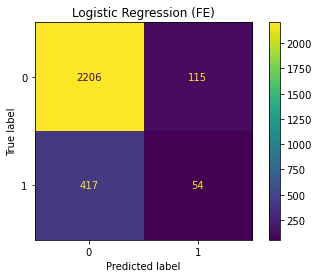

In [147]:
# Display confusion matrix for logistic regression (FE)
conf_matrix_plot(clf2_log, X_test, y_test, 'Logistic Regression (FE)')

#### Create classification report for logistic regression (feature engineering)

In [150]:
# Create a classification report
target_labels = ['stayed', 'left']
cr2_log = classification_report(y_test, y_pred2_lr, target_names=target_labels, digits=6)

# Display classification report results
print(cr2_log)

              precision    recall  f1-score   support

      stayed   0.841022  0.950452  0.892395      2321
        left   0.319527  0.114650  0.168750       471

    accuracy                       0.809456      2792
   macro avg   0.580274  0.532551  0.530572      2792
weighted avg   0.753047  0.809456  0.770319      2792



In [151]:
# Get evaluation statistics

# Get precision score
pc2_lr = precision_score(y_test, y_pred2_lr)
#print('The precision score is {pc2:.6f}'.format(pc2=pc2_lr))

# Get recall score
rc2_lr = recall_score(y_test, y_pred2_lr)
#print('The recall score is {rc2:.6f}'.format(rc2=rc2_lr))

# Get accuracy score
ac2_lr = accuracy_score(y_test, y_pred2_lr)
#print('The accuracy score is {ac2:.6f}'.format(ac2=ac2_lr))

# Get F1 score
f12_lr = f1_score(y_test, y_pred2_lr)
#print('The F1 score is {f12:.6f}'.format(f12=f12_lr))

# Get ROC AUC score
roc_auc2_lr = roc_auc_score(y_test, y_pred2_lr)
#print('The ROC AUC score is {roc_auc2:.6f}'.format(roc_auc2=roc_auc2_lr))

In [152]:
# Create dataframe with statistics
results2_lr = pd.DataFrame()
results2_lr = pd.DataFrame({'Model': 'Logistic Regression (FE)',
                        'Precision': [pc2_lr],
                        'Recall': [rc2_lr],
                        'F1': [f12_lr],
                        'Accuracy': [ac2_lr],
                        'AUC': [roc_auc2_lr]
                        })
results2_lr

Model  Precision   Recall       F1  Accuracy       AUC
0  Logistic Regression (FE)   0.319527  0.11465  0.16875  0.809456  0.532551

In [153]:
# Combine new scores with results
cv_results = pd.concat([cv_results, results2_lr]).sort_values(by=['AUC'], ascending=False).reset_index(drop=True)

# Display results of new dataframe
cv_results

Model  Precision    Recall        F1  Accuracy       AUC
0                XGBoost CV   0.973410  0.906898  0.938930  0.980429  0.981492
1          Random Forest CV   0.950023  0.915614  0.932467  0.977983  0.980425
2          Decision Tree CV   0.914552  0.916949  0.915707  0.971978  0.969819
3            XGBoost (test)   0.976293  0.909639  0.941788  0.981321  0.952619
4       Logistic Regression   0.440860  0.261146  0.328000  0.819484  0.596967
5  Logistic Regression (FE)   0.319527  0.114650  0.168750  0.809456  0.532551

The logistic regression (FE) model shows a precision of 32%, recall of 12%, accuracy of 81%, and F1 score of 17%. This model's performance is the most underwhelming.  Let's look into tree-based machine learning to find a better model.

### 2. Tree-based machine learning (feature engineering)

#### Split data (feature engineering)

In [154]:
# Isolate outcome (target) variable
y = df2['left']

In [155]:
# Select the features used in the model
X = df2.drop('left', axis=1)

In [156]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [157]:
# Confirm shape of new sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8993, 17), (2998, 17), (8993,), (2998,))

#### A. Build decision tree model (feature engineering)

Construct a decision tree model (feature engineering) and set up cross-validated grid-search to exhaustively search for the best model parameters.

In [158]:
# Instantiate model
decision_tree2 = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to cross-validated over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [1, 2, 5],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
clf2_dt = GridSearchCV(decision_tree2, cv_params, scoring=scoring, cv=4, refit='roc_auc', verbose=1)

In [159]:
%%time

# Fit the decision tree model to the training sets
clf2_dt.fit(X_train, y_train) # -----> Wall time ~3 seconds

Fitting 4 folds for each of 36 candidates, totalling 144 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 2.3 s, sys: 0 ns, total: 2.3 s
Wall time: 2.3 s


[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    2.3s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [1, 2, 5],
                

In [160]:
# Find best parameters
clf2_dt.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [161]:
# Check best AUC score on CV
clf2_dt.best_score_

0.9586752505340426

This model performs very well, even without satisfaction levels and detailed hours worked data.

In [162]:
# Get all cross-validated scores
cv_results2_dt = make_results('Decision Tree CV (FE)', clf2_dt, 'auc')
cv_results2_dt

Model  Precision    Recall        F1  Accuracy       AUC
0  Decision Tree CV (FE)   0.856693  0.903553  0.878882  0.958523  0.958675

In [163]:
# Combine new scores with results
cv_results = pd.concat([cv_results, cv_results2_dt]).sort_values(by=['AUC'], ascending=False).reset_index(drop=True)

# Display results of new dataframe
cv_results

Model  Precision    Recall        F1  Accuracy       AUC
0                XGBoost CV   0.973410  0.906898  0.938930  0.980429  0.981492
1          Random Forest CV   0.950023  0.915614  0.932467  0.977983  0.980425
2          Decision Tree CV   0.914552  0.916949  0.915707  0.971978  0.969819
3     Decision Tree CV (FE)   0.856693  0.903553  0.878882  0.958523  0.958675
4            XGBoost (test)   0.976293  0.909639  0.941788  0.981321  0.952619
5       Logistic Regression   0.440860  0.261146  0.328000  0.819484  0.596967
6  Logistic Regression (FE)   0.319527  0.114650  0.168750  0.809456  0.532551

Some of the other scores fell. That's to be expected given fewer features were taken into account in this round of the model. Still, the scores are very good.

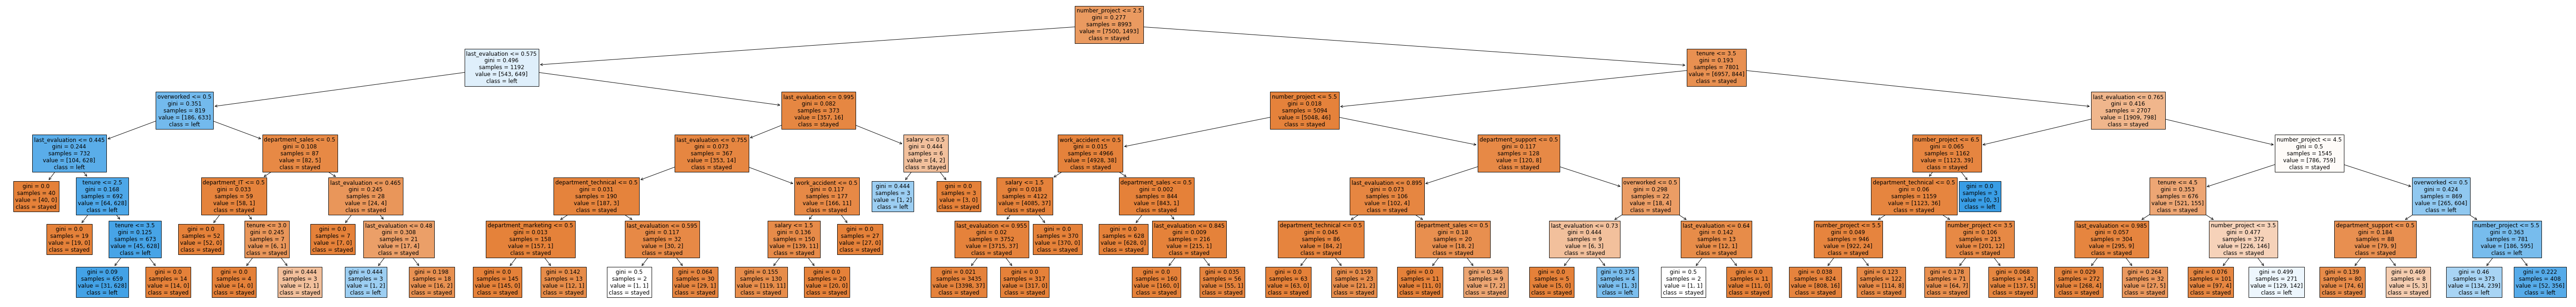

In [164]:
# Plot the tree
plt.figure(figsize=(100,12))
plot_tree(clf2_dt.best_estimator_, max_depth=6, fontsize=12, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

Double-click on the tree image to zoom in on it and inspect the splits.

This plot tells us that, if we could only do a single split on a single variable, the one that would most help us predict whether an employee will leave is their `number_project`.

If we look at the nodes at depth one, we notice that `last_evaluation` and `tenure` also are both strong predictors (relative to the features we have) of whether or not they will leave. 

In [165]:
# Find `feature_importances`
dt2_importances = model_importances(clf2_dt.best_estimator_, X)

# Display `feature_importances`
dt2_importances

gini_importance
last_evaluation              0.343958
number_project               0.343385
tenure                       0.215681
overworked                   0.093498
department_support           0.001142
salary                       0.000910
department_sales             0.000607
department_technical         0.000418
work_accident                0.000183
department_IT                0.000139
department_marketing         0.000078

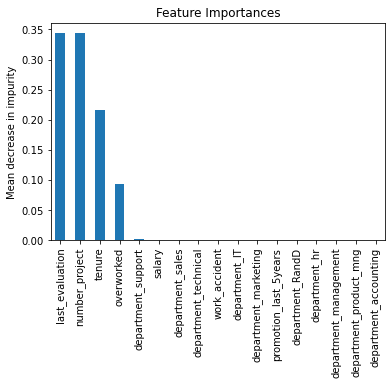

In [166]:
# Plot and display `feature_importances_` attribute relative to each feature
model_importances_plot(clf2_dt.best_estimator_, X)

`last_evaluation` and `number_project` are almost equal in importance for this Decision Tree (feature engineering) model. Other features that relate to if an employee leaves are `tenure` and `overworked`. There are other minor importances but they are negligible.

#### B. Build random forest model (feature engineering)

Construct a random forest model (feature engineering) and set up cross-validated grid-search to exhaustively search for the best model parameters.

In [167]:
# Instantiate model
random_forest2 = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3, 5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1, 2, 3],
             'min_samples_split': [2, 3, 4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
clf2_rf = GridSearchCV(random_forest2, cv_params, scoring=scoring, cv=4, refit='roc_auc', verbose=1)

In [168]:
%%time

# Fit the random forest model to the training sets
'''
UNCOMMENT line below if running for the FIRST time, then
RECOMMENT when done
'''
#clf2_rf.fit(X_train, y_train) # -----> Wall time ~8 minutes

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.78 µs


'\nUNCOMMENT line below if running for the FIRST time, then\nRECOMMENT when done\n'

In [169]:
# Write pickle
'''
UNCOMMENT line below if running for the FIRST time, then
RECOMMENT when done
'''
#write_pickle(path, clf2_rf, 'hr_clf2_rf')

'\nUNCOMMENT line below if running for the FIRST time, then\nRECOMMENT when done\n'

In [170]:
# Read pickle
clf2_rf = read_pickle(path, 'hr_clf2_rf')

In [171]:
# Check best AUC score on CV
clf2_rf.best_score_

0.9648100662833985

In [172]:
# Check best params
clf2_rf.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [173]:
# Get all CV scores
cv_results2_rf = make_results('Random Forest CV (FE)', clf2_rf, 'auc')
cv_results2_rf

Model  Precision    Recall        F1  Accuracy      AUC
0  Random Forest CV (FE)   0.866758  0.878754  0.872407  0.957411  0.96481

In [174]:
# Combine new scores with results
cv_results = pd.concat([cv_results, cv_results2_rf]).sort_values(by=['AUC'], ascending=False).reset_index(drop=True)

# Display results of new dataframe
cv_results

Model  Precision    Recall        F1  Accuracy       AUC
0                XGBoost CV   0.973410  0.906898  0.938930  0.980429  0.981492
1          Random Forest CV   0.950023  0.915614  0.932467  0.977983  0.980425
2          Decision Tree CV   0.914552  0.916949  0.915707  0.971978  0.969819
3     Random Forest CV (FE)   0.866758  0.878754  0.872407  0.957411  0.964810
4     Decision Tree CV (FE)   0.856693  0.903553  0.878882  0.958523  0.958675
5            XGBoost (test)   0.976293  0.909639  0.941788  0.981321  0.952619
6       Logistic Regression   0.440860  0.261146  0.328000  0.819484  0.596967
7  Logistic Regression (FE)   0.319527  0.114650  0.168750  0.809456  0.532551

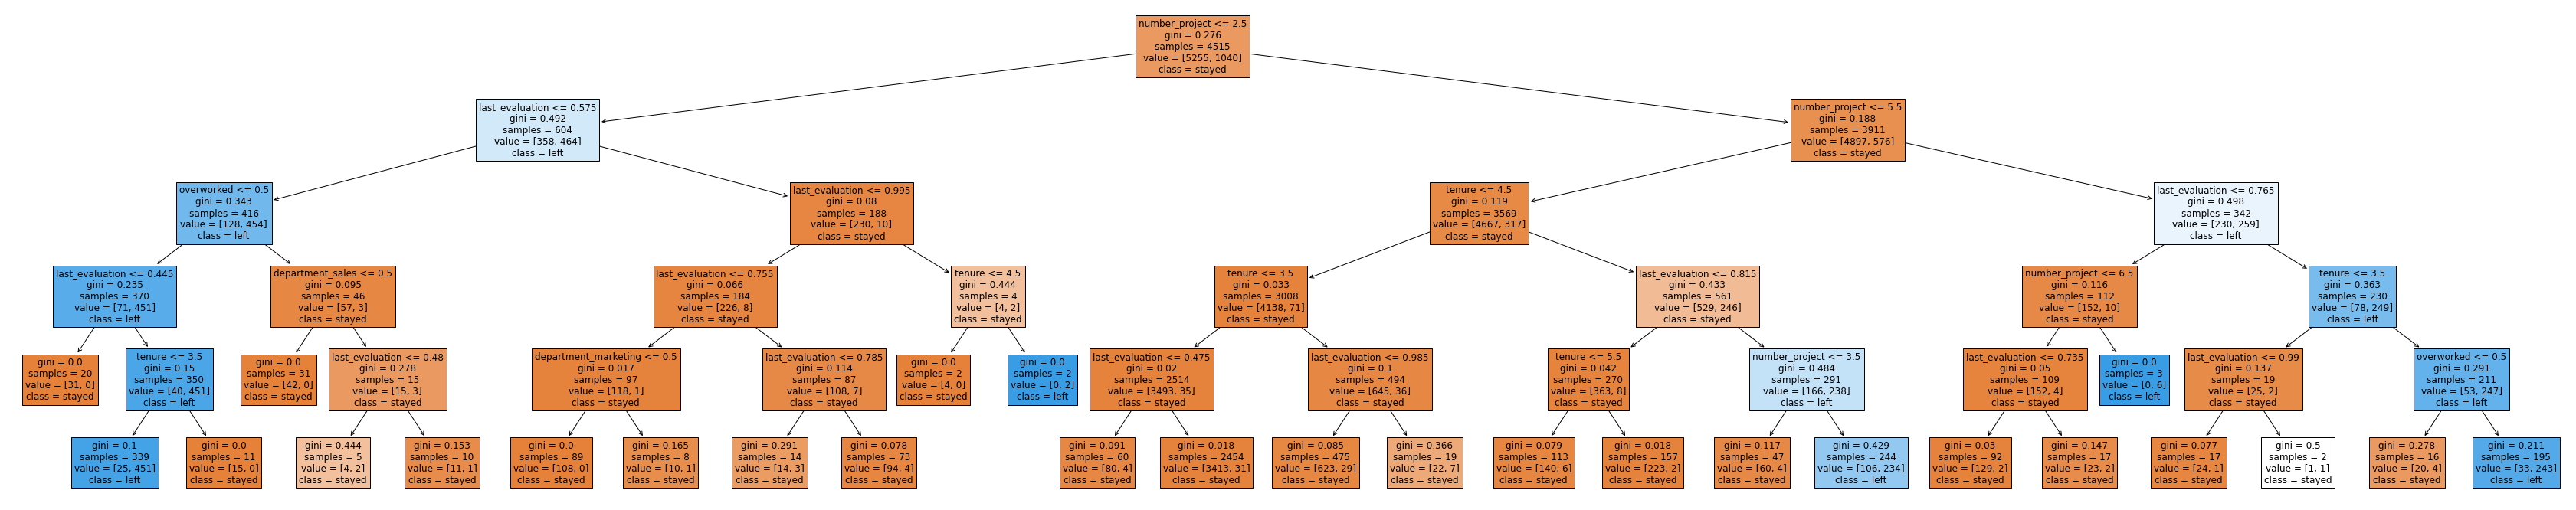

In [175]:
# Plot the tree
plt.figure(figsize=(60,12))
plot_tree(clf2_rf.best_estimator_[0], max_depth=5, fontsize=12, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True)
plt.show()

Double-click on the tree image to zoom in on it and inspect the splits.

This plot tells us that, if we could only do a single split on a single variable, the one that would most help us predict whether an employee will leave is their `number_project`.

If we look at the nodes at depth one, we notice that `last_evaluation` is also a strong predictor (relative to the features we have) of whether or not they will leave. 

In [176]:
# Find `feature_importances`
rf2_importances = model_importances(clf2_rf.best_estimator_[0], X)

# Display `feature_importances`
rf2_importances

gini_importance
number_project               0.424579
last_evaluation              0.364854
tenure                       0.137219
overworked                   0.072678
department_sales             0.000542
department_marketing         0.000128

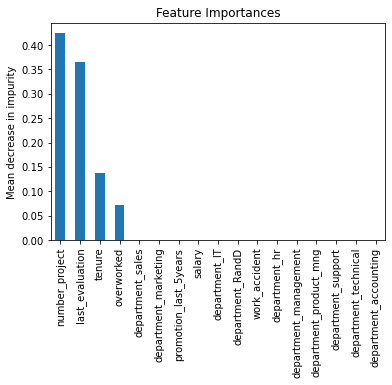

In [177]:
# Plot and display `feature_importances_` attribute relative to each feature
model_importances_plot(clf2_rf.best_estimator_[0], X)

For this Random Forest (feature engineering) model, `number_project` and `last_evaluation` are the two most predictive features. Other features that relate to if an employee leaves are `tenure` and `overworked`. There are other minor importances but they are negligible.

#### C. Build XGBoost model (feature engineering)

Construct an XGBoost model (feature engineering) and set up cross-validated grid-search to search for the best model parameters.

In [178]:
# Instantiate the XGBoost classifier
xgb2 = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
#cv_params = {'max_depth': [4, 8, 12],
#                 'min_child_weight': [3, 5],
#                 'learning_rate': [0.01, 0.1],
#                 'n_estimators': [300, 500]
#                 }

cv_params = {'max_depth': [4, 6],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [5, 10, 15],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate the GridSearchCV object
clf2_xgb = GridSearchCV(xgb2, cv_params, scoring=scoring, cv=5, refit='roc_auc', verbose=1)

In [179]:
%%time

# Fit the random forest model to the training sets
'''
UNCOMMENT line below if running for the FIRST time, then
RECOMMENT when done
'''
#clf2_xgb.fit(X_train, y_train) # -----> Wall time ~15 seconds

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 10.3 µs


'\nUNCOMMENT line below if running for the FIRST time, then\nRECOMMENT when done\n'

In [180]:
# Write pickle
'''
UNCOMMENT line below if running for the FIRST time, then
RECOMMENT when done
'''
#write_pickle(path, clf2_xgb, 'hr_clf2_xgb')

'\nUNCOMMENT line below if running for the FIRST time, then\nRECOMMENT when done\n'

In [181]:
# Read pickle
clf2_xgb = read_pickle(path, 'hr_clf2_xgb')

In [182]:
# Check best AUC score on CV
clf2_xgb.best_score_

0.9701667167964805

In [183]:
# Check best params
clf2_xgb.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.3,
 'max_depth': 4,
 'min_child_weight': 3,
 'n_estimators': 15,
 'subsample': 0.7}

In [184]:
# Get all CV scores
cv_results2_xgb = make_results('XGBoost CV (FE)', clf2_xgb, 'auc')
cv_results2_xgb

Model  Precision    Recall        F1  Accuracy       AUC
0  XGBoost CV (FE)   0.902908  0.878068  0.890243  0.964082  0.970167

In [185]:
# Combine new scores with results
cv_results = pd.concat([cv_results, cv_results2_xgb]).sort_values(by=['AUC'], ascending=False).reset_index(drop=True)

# Display results of new dataframe
cv_results

Model  Precision    Recall        F1  Accuracy       AUC
0                XGBoost CV   0.973410  0.906898  0.938930  0.980429  0.981492
1          Random Forest CV   0.950023  0.915614  0.932467  0.977983  0.980425
2           XGBoost CV (FE)   0.902908  0.878068  0.890243  0.964082  0.970167
3          Decision Tree CV   0.914552  0.916949  0.915707  0.971978  0.969819
4     Random Forest CV (FE)   0.866758  0.878754  0.872407  0.957411  0.964810
5     Decision Tree CV (FE)   0.856693  0.903553  0.878882  0.958523  0.958675
6            XGBoost (test)   0.976293  0.909639  0.941788  0.981321  0.952619
7       Logistic Regression   0.440860  0.261146  0.328000  0.819484  0.596967
8  Logistic Regression (FE)   0.319527  0.114650  0.168750  0.809456  0.532551

The evaluation scores of the XGBoost (FE) model are better than those of the Random Forest (FE) model, with the exception of recall (the recall score of the XGBoost model is approximately 0.0007 lower. This indicates that the XGBoost (FE) model mostly outperforms the Random Forest (FE) model.

This Python environment does not have the package `graphviz` installed so we are not able to plot the tree for the XGBoost (FE) model.

In [186]:
# Find `feature_importances`
xgb2_importances = model_importances(clf2_xgb.best_estimator_, X)

# Display `feature_importances`
xgb2_importances

gini_importance
number_project                 0.318401
tenure                         0.226006
last_evaluation                0.193888
overworked                     0.136101
work_accident                  0.075009
salary                         0.025694
department_product_mng         0.009842
department_support             0.005652
department_marketing           0.005240
department_sales               0.001931
department_RandD               0.001282
department_accounting          0.000954

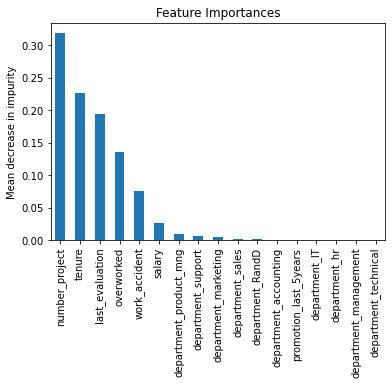

In [187]:
# Plot and display `feature_importances_` attribute relative to each feature
model_importances_plot(clf2_xgb.best_estimator_, X)

# XGBoost has built in plot method to show `feature_importances`
#ax = plot_importance(clf_xgb.best_estimator_, importance_type='gain')
#fig = ax.figure
#fig.set_size_inches(10, 8)

Using an XGBoost (FE) model, we see that the main predictive features are: `number_project`, `tenure`, `last_evaluation`, `overworked`, `work_accident` and `salary`.

### Use best performing (feature engineering) model to predict on the test set

In [188]:
# Get predictions on test data
test_scores2_xgb = get_scores('XGBoost (FE test)', clf2_xgb, X_test, y_test)
test_scores2_xgb

Model  Precision    Recall        F1  Accuracy       AUC
0  XGBoost (FE test)   0.884692  0.893574  0.889111  0.962975  0.935187

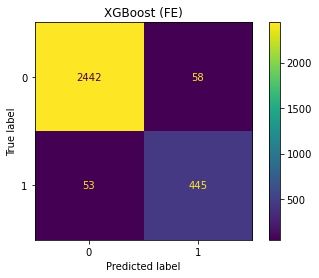

In [189]:
# Display confusion matrix for best performing model
conf_matrix_plot(clf2_xgb, X_test, y_test, 'XGBoost (FE)')

In [190]:
# Use the XGBoost model to get predictions on the testing set
y_pred2_xgb = clf2_xgb.best_estimator_.predict(X_test)

In [191]:
# Create a classification report for XGBoost model
target_labels = ['stayed', 'left']
cr_best_model_fe = classification_report(y_test, y_pred2_xgb, target_names=target_labels, digits=6)

# Display classification report
print(cr_best_model_fe)

              precision    recall  f1-score   support

      stayed   0.978758  0.976800  0.977778      2500
        left   0.884692  0.893574  0.889111       498

    accuracy                       0.962975      2998
   macro avg   0.931725  0.935187  0.933444      2998
weighted avg   0.963132  0.962975  0.963049      2998



In [192]:
# Combine new scores with results
cv_results = pd.concat([cv_results, test_scores2_xgb]).sort_values(by=['AUC'], ascending=False).reset_index(drop=True)

# Display results of new dataframe
cv_results

Model  Precision    Recall        F1  Accuracy       AUC
0                XGBoost CV   0.973410  0.906898  0.938930  0.980429  0.981492
1          Random Forest CV   0.950023  0.915614  0.932467  0.977983  0.980425
2           XGBoost CV (FE)   0.902908  0.878068  0.890243  0.964082  0.970167
3          Decision Tree CV   0.914552  0.916949  0.915707  0.971978  0.969819
4     Random Forest CV (FE)   0.866758  0.878754  0.872407  0.957411  0.964810
5     Decision Tree CV (FE)   0.856693  0.903553  0.878882  0.958523  0.958675
6            XGBoost (test)   0.976293  0.909639  0.941788  0.981321  0.952619
7         XGBoost (FE test)   0.884692  0.893574  0.889111  0.962975  0.935187
8       Logistic Regression   0.440860  0.261146  0.328000  0.819484  0.596967
9  Logistic Regression (FE)   0.319527  0.114650  0.168750  0.809456  0.532551

The evaluations scores for XGBoost (FE test) are lower than XGBoost (test) but that's to be expected because we removed `satisfaction_level` and used feature engineering to create the new binary variable `overworked` which is set to 1 if an employee works more than 175 hours per month, and 0 otherwise.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Logistic Regression**

In [197]:
# Display evaluation metrics for logistic regression model
print(cr_log)

              precision    recall  f1-score   support

      stayed   0.861520  0.932788  0.895739      2321
        left   0.440860  0.261146  0.328000       471

    accuracy                       0.819484      2792
   macro avg   0.651190  0.596967  0.611869      2792
weighted avg   0.790556  0.819484  0.799963      2792



In [198]:
# Display evaluation metrics for logistic regression (feature engineering) model
print(cr2_log)

              precision    recall  f1-score   support

      stayed   0.841022  0.950452  0.892395      2321
        left   0.319527  0.114650  0.168750       471

    accuracy                       0.809456      2792
   macro avg   0.580274  0.532551  0.530572      2792
weighted avg   0.753047  0.809456  0.770319      2792



The logistic regression model achieved precision of 79.1%, recall of 81.9%, F1-score of 80.0% (all weighted averages), and accuracy of 81.9%, on the test set.

The logistic regression model with feature engineering achieved precision of 75.3%, recall of 80.9%, F1-score of 77.0% (all weighted averages), and accuracy of 80.9%, on the test set.

Scores are lower if we want to find employees that are predicted to leave.

**Tree-based Machine Learning**

In [199]:
# Display evaluation metrics for best performing model
print(cr_best_model)

              precision    recall  f1-score   support

      stayed   0.982242  0.995600  0.988876      2500
        left   0.976293  0.909639  0.941788       498

    accuracy                       0.981321      2998
   macro avg   0.979267  0.952619  0.965332      2998
weighted avg   0.981253  0.981321  0.981054      2998



In [201]:
# Display evaluation metrics for best performing (feature engineering) model
print(cr_best_model_fe)

              precision    recall  f1-score   support

      stayed   0.978758  0.976800  0.977778      2500
        left   0.884692  0.893574  0.889111       498

    accuracy                       0.962975      2998
   macro avg   0.931725  0.935187  0.933444      2998
weighted avg   0.963132  0.962975  0.963049      2998



The best tree-based model with and without feature engineering is XGBoost.

XGBoost achieved AUC of 95.3%, precision of 97.6%, recall of 91.0%, F1-score of 94.2%, and accuracy of 98.1%, on the test set.

After conducting feature engineering, the XGBoost model with feature engineering achieved AUC of 93.5%, precision of 88.5%, recall of 89.4%, F1-score of 88.9%, and accuracy of 96.3%, on the test set.

In [202]:
# Display all scores of models
cv_results

Model  Precision    Recall        F1  Accuracy       AUC
0                XGBoost CV   0.973410  0.906898  0.938930  0.980429  0.981492
1          Random Forest CV   0.950023  0.915614  0.932467  0.977983  0.980425
2           XGBoost CV (FE)   0.902908  0.878068  0.890243  0.964082  0.970167
3          Decision Tree CV   0.914552  0.916949  0.915707  0.971978  0.969819
4     Random Forest CV (FE)   0.866758  0.878754  0.872407  0.957411  0.964810
5     Decision Tree CV (FE)   0.856693  0.903553  0.878882  0.958523  0.958675
6            XGBoost (test)   0.976293  0.909639  0.941788  0.981321  0.952619
7         XGBoost (FE test)   0.884692  0.893574  0.889111  0.962975  0.935187
8       Logistic Regression   0.440860  0.261146  0.328000  0.819484  0.596967
9  Logistic Regression (FE)   0.319527  0.114650  0.168750  0.809456  0.532551

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at Salifort Motors are overworked. 

The following recommendations could be help retain employees:

* Cap the number of projects that employees can work on. 3-4 projects seems to be optimal.
* Consider promoting employees who have been with the company for at least 4 years, and investigate why 4-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or don't require them to do so. 
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 

**Next Steps**

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when `last_evaluation` is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score. 

For another project, we could try building a K-means model on this data and analyzing the clusters because of the odd distribution for satisfaction level, evaluation scores, and average monthly hours worked.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.